# 1. Démarrer la formation

**Objectifs et Déroulement**

- Importater et analyser les données financières
    - Manipuler des données bourssières avec pandas et yfinance

- Réaliser des graphiques percutants pour vos analyses 
    - Matplotlib, Plotly et ipywidgets pour créer des visualisations dynamiques et interactives adaptées à l'analyse financière

- Calculer des indicateurs technique en python
    - Création de SMA, EMA, RSI et autres outils d'analyse technique

- Construire des modèles et backtester vos stratégies
    - Test et optimisation de stratégies de trading automatisées, classification et régression avec sckit-learn et XGBoost

#### 1. Prérequis Recommandés

- Python : une connaissance de base du langage Python : les variables, les boucles, les fonctions, les listes et les dictionnaires

- Finance : Avoir une culture générale en finance : savoir ce qu'est une action, un rendement, une volatilité ou une moyenne mobile

- Avoir la curiosité et la motivation pour progression

#### Outils : Python, Jupyter Notebook, Bibliothèques spécialisées comme pandas, numpy, yfinance, scikit-learn, backtrader

#### 2. Installer Anaconda et démarrer Jupyter Notebook

#### 3. Découvrir Codespaces

# 2. Maîtiser la préparation des données financières

 Objectif général

 À la fin de ce chapitre, vous serez capable de :

 - Importer des données financières depuis différentes sources (Yahoo Finance, CSV)

 - Nettoyer des données : valeurs manquantes, doublons, anomalies

 - Générer les formats de date et manipuler les fréquences (journalier, hebdomadaire, mensuel)

 - Filtrer et échantillonner des sous-ensembles de données cohérentes

 - Appliquer ces compétences sur des cas concrets avec du code python

 Dans ce premier chapitre du cours python pour la finance, vous apprendrez à transformer des données brutes issues de marchés financiers (ex. données bourssières) en un format propre, cohérent et prêt pour l'analyse. L'objectif est de bâtir une base de données fiable pour calculer des indicateurs, visualiser des tendances et développer des modèles prédictifs.

1. **Importer des données**

**Objectifs** : Apprendre à importer efficacement des données bourssières (Yahoo Finance, CSV, etc.) et à les stocker dans des DataFrames pour préparer l'analyse financière à venir.

In [1083]:
# !pip install yfinance

In [1084]:
import yfinance as yf
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

 Télécharger le cours de l'action d'APPLE entre 2020 et 2024

In [1085]:
apple = yf.download("AAPL", start="2020-01-01", end="2024-12-31")


[*********************100%***********************]  1 of 1 completed


In [1086]:
apple.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.538513,72.598892,71.292304,71.545890,135480400
2020-01-03,71.833298,72.594063,71.608692,71.765674,146322800
2020-01-06,72.405655,72.444298,70.702990,70.954166,118387200
2020-01-07,72.065140,72.671333,71.845362,72.415330,108872000
2020-01-08,73.224411,73.526303,71.768086,71.768086,132079200


Avoir des infos précis sur la base de données

In [1087]:
apple.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2020-01-02 to 2024-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1257 non-null   float64
 1   (High, AAPL)    1257 non-null   float64
 2   (Low, AAPL)     1257 non-null   float64
 3   (Open, AAPL)    1257 non-null   float64
 4   (Volume, AAPL)  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


Supprimer le niveau Ticker

In [1088]:
apple.columns = apple.columns.droplevel("Ticker")

In [1089]:
apple.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,72.538513,72.598892,71.292304,71.545890,135480400
2020-01-03,71.833298,72.594063,71.608692,71.765674,146322800
2020-01-06,72.405655,72.444298,70.702990,70.954166,118387200
2020-01-07,72.065140,72.671333,71.845362,72.415330,108872000
2020-01-08,73.224411,73.526303,71.768086,71.768086,132079200


Afficher les colonnes du DataFrame

In [1090]:
print(apple.columns)

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')


Afficher l'Index du DataFrame

In [1091]:
print(apple.index)

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2024-12-16', '2024-12-17', '2024-12-18', '2024-12-19',
               '2024-12-20', '2024-12-23', '2024-12-24', '2024-12-26',
               '2024-12-27', '2024-12-30'],
              dtype='datetime64[ns]', name='Date', length=1257, freq=None)


Afficher le nombre de lignes et de colonnes du DataFrame

In [1092]:
print(apple.shape)

(1257, 5)


Afficher le nombre total d'éléments du DataFrame

In [1093]:
print(apple.size)

6285


Données d'APPLE et de TESLA sur la même période

In [1094]:
apple_tesla = yf.download(["AAPL", "TSLA"], start="2020-01-01", end="2024-12-31", group_by="ticker") # group_by permet d'éviter le mélange des données et d'avoir une bonne séparation

[*********************100%***********************]  2 of 2 completed


In [1095]:
apple_tesla.head()

Ticker           TSLA                                                   AAPL  \
Price            Open       High        Low      Close     Volume       Open   
Date                                                                           
2020-01-02  28.299999  28.713333  28.114000  28.684000  142981500  71.545890   
2020-01-03  29.366667  30.266666  29.128000  29.534000  266677500  71.765674   
2020-01-06  29.364668  30.104000  29.333332  30.102667  151995000  70.954166   
2020-01-07  30.760000  31.441999  30.224001  31.270666  268231500  72.415330   
2020-01-08  31.580000  33.232666  31.215334  32.809334  467164500  71.768086   

Ticker                                                  
Price            High        Low      Close     Volume  
Date                                                    
2020-01-02  72.598892  71.292304  72.538513  135480400  
2020-01-03  72.594063  71.608692  71.833298  146322800  
2020-01-06  72.444298  70.702990  72.405655  118387200  
2020-01-07  72.671333  71.845362  72.065140  108872000  
2020-01-08  73.526303  71.768086  73.224411  132079200

In [1096]:
tesla = apple_tesla["TSLA"]
apple = apple_tesla["AAPL"]

In [1097]:
apple.head()

Price,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,71.545890,72.598892,71.292304,72.538513,135480400
2020-01-03,71.765674,72.594063,71.608692,71.833298,146322800
2020-01-06,70.954166,72.444298,70.702990,72.405655,118387200
2020-01-07,72.415330,72.671333,71.845362,72.065140,108872000
2020-01-08,71.768086,73.526303,71.768086,73.224411,132079200


Ou lorsqu'on souhaite travailler avec des données qui se trouvent au sein de notre organisation

- apple = pd.read_csv("chemin d'accès")

2. **Nettoter des données**

**Objectif** : Identifier et traiter les valeurs manquantes, des doublons et les anomalies pour garantir la fiabilité des données financières.



In [1098]:
apple.isnull()

Price,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,False,False,False,False,False
2020-01-03,False,False,False,False,False
2020-01-06,False,False,False,False,False
2020-01-07,False,False,False,False,False
2020-01-08,False,False,False,False,False
...,...,...,...,...,...
2024-12-23,False,False,False,False,False
2024-12-24,False,False,False,False,False
2024-12-26,False,False,False,False,False


 Somme des données manquantes sur chaque colonnes

In [1099]:
apple.isnull().sum()

Price
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Pour avoir la proportion de valeurs manquantes

In [1100]:
apple.isnull().mean() 

Price
Open      0.0
High      0.0
Low       0.0
Close     0.0
Volume    0.0
dtype: float64

Pour voir si on n'a pas de doublons

In [1101]:
apple.duplicated().sum() 

np.int64(0)

Pour récupérer les lignes pour lequelles on a des doublons

In [1102]:
apple[apple.duplicated()] 

Price,Open,High,Low,Close,Volume
Date,,,,,


Si on a des données manquantes dans notre base de données on peut les supprimer

In [1103]:
apple_clean = apple.dropna()
apple_clean.head()

Price,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,71.545890,72.598892,71.292304,72.538513,135480400
2020-01-03,71.765674,72.594063,71.608692,71.833298,146322800
2020-01-06,70.954166,72.444298,70.702990,72.405655,118387200
2020-01-07,72.415330,72.671333,71.845362,72.065140,108872000
2020-01-08,71.768086,73.526303,71.768086,73.224411,132079200


**Dans la pratique au lieu de supprimer, on peut remplacer par la moyenne, la médiane, ou d'autres indicateurs**

Si on souhaite supprimer des diublons

In [1104]:
apple_clean = apple_clean.drop_duplicates()

In [1105]:
apple_clean.head()

Price,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,71.545890,72.598892,71.292304,72.538513,135480400
2020-01-03,71.765674,72.594063,71.608692,71.833298,146322800
2020-01-06,70.954166,72.444298,70.702990,72.405655,118387200
2020-01-07,72.415330,72.671333,71.845362,72.065140,108872000
2020-01-08,71.768086,73.526303,71.768086,73.224411,132079200


3. **Gérer les dates et fréquences**

**Objectifs** : Convertir les formats de date et passer d'une fréquence journalière à hebdomadaire ou mensuelle. Assurer la cohérence temporelle pour l'analyse de séries financières

In [1106]:
apple_clean.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2024-12-16', '2024-12-17', '2024-12-18', '2024-12-19',
               '2024-12-20', '2024-12-23', '2024-12-24', '2024-12-26',
               '2024-12-27', '2024-12-30'],
              dtype='datetime64[ns]', name='Date', length=1257, freq=None)

**Les dates doivent être en format datetime**

In [1107]:
apple_clean.index = pd.to_datetime(apple_clean.index) 

In [1108]:
type(apple_clean.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [1109]:
type(apple_clean) # type

pandas.core.frame.DataFrame

Passer d'une fréquence journalière à une fréquence hebdomadaire

In [1110]:
weekly_data = apple_clean.resample("w").mean() # récupère des données journalières, faire des moyennes hebdomadaires et rétourner les valeurs de ces moyennes

In [1111]:
weekly_data.head()

Price,Open,High,Low,Close,Volume
Date,,,,,
2020-01-05,71.655782,72.596477,71.450498,72.185905,140901600.0
2020-01-12,72.870827,73.825770,72.542853,73.484753,134018320.0
2020-01-19,75.837588,76.539425,75.350213,76.074269,130411120.0
2020-01-26,76.918353,77.398962,76.467930,76.789749,115921300.0
2020-02-02,76.732634,77.515618,75.617326,76.528796,173346960.0


Passer à une fréquence mensuelle

In [1112]:
monthly_data = apple_clean.resample("M").mean() # On prend les données du mois, on fait la moyenne et on l'affecte au dernier du mois

In [1113]:
monthly_data

Price,Open,High,Low,Close,Volume
Date,,,,,
2020-01-31,75.151915,75.913946,74.586889,75.331900,1.397319e+08
2020-02-29,75.084562,76.279689,74.216429,75.315944,1.589094e+08
2020-03-31,63.202394,65.288958,61.694855,63.534162,2.854578e+08
2020-04-30,65.801866,66.762950,64.899576,65.941008,1.554904e+08
2020-05-31,74.931117,75.990012,74.323389,75.197805,1.402968e+08
2020-06-30,83.634587,84.800630,82.688224,83.941654,1.474262e+08
2020-07-31,92.647252,93.782621,91.528874,92.791683,1.372856e+08
2020-08-31,113.742246,115.293583,112.367766,114.062673,1.938124e+08
2020-09-30,112.912158,114.815905,109.513203,111.984368,1.850117e+08


Pour les données trimestrielles

In [1114]:
quaterly_data = apple_clean.resample("Q").mean()

In [1115]:
quaterly_data

Price,Open,High,Low,Close,Volume
Date,,,,,
2020-03-31,70.891122,72.255872,69.898768,71.140716,1.973181e+08
2020-06-30,74.927340,75.991048,74.103171,75.165614,1.478510e+08
2020-09-30,106.218469,107.742452,104.267743,106.068826,1.714936e+08
2020-12-31,117.146023,118.604250,115.666115,117.122525,1.146865e+08
2021-03-31,125.433436,126.857688,123.534232,125.185208,1.102383e+08
2021-06-30,126.440382,127.588516,125.423528,126.568366,8.267274e+07
2021-09-30,143.975291,145.296461,142.740524,144.044299,8.091270e+07
2021-12-31,154.324449,156.236800,153.029321,154.858297,8.907617e+07
2022-03-31,164.864704,167.020192,162.756245,164.999104,9.543165e+07


Pour des données annuelles

In [1116]:
yearly_data = apple_clean.resample("y").mean()

In [1117]:
yearly_data

Price,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,92.533595,93.887308,91.217353,92.610295,1.575646e+08
2021-12-31,137.731615,139.184619,136.375161,137.856631,9.052463e+07
2022-12-31,152.203232,154.272926,150.127144,152.234924,8.791038e+07
2023-12-31,170.387285,171.970138,169.126458,170.676109,5.922355e+07
2024-12-31,205.603921,207.555331,203.883047,205.865364,5.717700e+07


4. **Contrôler la cohérence et filtrer des données**

**Objectif** : Sélectionner les lignes et colonnes pertinentes, filtrer les valeurs extrêmes ou non désirées.

In [1118]:
apple = yf.download("AAPL", start="2020-01-01", end="2024-12-31")

[*********************100%***********************]  1 of 1 completed


In [1119]:
apple.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.538513,72.598892,71.292304,71.545890,135480400
2020-01-03,71.833298,72.594063,71.608692,71.765674,146322800
2020-01-06,72.405655,72.444298,70.702990,70.954166,118387200
2020-01-07,72.065140,72.671333,71.845362,72.415330,108872000
2020-01-08,73.224411,73.526303,71.768086,71.768086,132079200


In [1120]:
apple.columns = apple.columns.droplevel("Ticker")

In [1121]:
apple.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,72.538513,72.598892,71.292304,71.545890,135480400
2020-01-03,71.833298,72.594063,71.608692,71.765674,146322800
2020-01-06,72.405655,72.444298,70.702990,70.954166,118387200
2020-01-07,72.065140,72.671333,71.845362,72.415330,108872000
2020-01-08,73.224411,73.526303,71.768086,71.768086,132079200


In [1122]:
apple.dropna(inplace=True)

In [1123]:
apple.tail()

Price,Close,High,Low,Open,Volume
Date,,,,,
2024-12-23,254.367035,254.745680,252.553466,253.868804,40858800
2024-12-24,257.286682,257.296626,254.386957,254.586262,23234700
2024-12-26,258.103729,259.179926,256.718662,257.276679,27237100
2024-12-27,254.685883,257.784897,252.164833,256.917949,42355300
2024-12-30,251.307861,252.603266,249.862994,251.337754,35557500


In [1124]:
data_filtered = apple[["Open", "Close", "Volume"]]

In [1125]:
data_filtered.head()

Price,Open,Close,Volume
Date,,,
2020-01-02,71.545890,72.538513,135480400
2020-01-03,71.765674,71.833298,146322800
2020-01-06,70.954166,72.405655,118387200
2020-01-07,72.415330,72.065140,108872000
2020-01-08,71.768086,73.224411,132079200


Conserver les données entre deux périodes données (filtrer à partir de l'index)

In [1126]:
data_filtered_period = apple.loc["2024-03-01":"2024-09-30"]

In [1127]:
data_filtered_period.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2024-03-01,178.379028,179.242820,176.115286,178.269812,73563100
2024-03-04,173.851547,175.638701,172.550875,174.894049,81510100
2024-03-05,168.907043,170.813352,168.410608,169.542480,95132400
2024-03-06,167.914185,170.019079,167.477319,169.840355,68587700
2024-03-07,167.795044,169.512705,167.288686,167.943968,71765100


- Filtrer à partir des valeurs : filtrer sur des lignes qui ont des valeurs de clôture supérieures à 250

- On veut conserver uniquement les dates pour lesquelles la valeur de clôture est supérieur à 250

In [1128]:
data_filtered_period = apple[apple["Close"]>250]

In [1129]:
data_filtered_period.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2024-12-16,250.151978,250.490786,246.773970,247.112779,51694800
2024-12-17,252.583344,252.932112,248.896435,249.195377,51356400
2024-12-20,253.589798,254.097988,244.820923,247.162601,147495300
2024-12-23,254.367035,254.745680,252.553466,253.868804,40858800
2024-12-24,257.286682,257.296626,254.386957,254.586262,23234700


In [1130]:
data_filtered_period.describe()

Price,Close,High,Low,Open,Volume
count,8.000000,8.000000,8.000000,8.000000,8.000000e+00
mean,254.009539,254.891410,250.772280,252.182275,5.247374e+07
std,2.738022,2.967428,3.951273,4.097644,3.972443e+07
min,250.151978,250.490786,244.820923,247.112779,2.323470e+07
25%,252.264473,252.849900,248.365819,248.687183,3.347740e+07
50%,253.978416,254.421834,251.013913,252.603279,4.160705e+07
75%,255.336082,257.418694,253.011838,255.169183,5.144100e+07
max,258.103729,259.179926,256.718662,257.276679,1.474953e+08


5. **Echantillonner les données, uniformisation des données**

**Objectif**: Uniformiser l'unité et le format des colonnes pour comparer différents actifs. Créer des échantillons pour tester les modèles.

Convertir les données de la colonne Volume en millier

In [1131]:
apple["Volume"].describe()

count    1.257000e+03
mean     9.061168e+07
std      5.324605e+07
min      2.323470e+07
25%      5.546960e+07
50%      7.629970e+07
75%      1.077601e+08
max      4.265100e+08
Name: Volume, dtype: float64

In [1132]:
apple["Volume"] = apple["Volume"]/1000

In [1133]:
apple["Volume"].describe()

count      1257.000000
mean      90611.679316
std       53246.046214
min       23234.700000
25%       55469.600000
50%       76299.700000
75%      107760.100000
max      426510.000000
Name: Volume, dtype: float64

Prendre un échantillon de 20% de nos données

In [1134]:
sample = apple.sample(frac=0.2, random_state=255)

In [1135]:
sample.describe()

Price,Close,High,Low,Open,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000
mean,153.455943,154.935486,151.740062,153.282054,89556.594422
std,41.750269,41.668534,41.296238,41.456457,57843.454025
min,55.495899,60.211739,55.195711,59.674307,35169.600000
25%,127.714581,128.201251,125.458202,126.561852,53949.400000
50%,153.395462,154.361641,151.213046,152.670033,74602.000000
75%,178.699669,179.704815,177.060716,178.333255,104117.950000
max,254.367035,254.745680,252.553466,253.868804,426510.000000


Echantillonner en fonction du nombre d'observation (200)

In [1136]:
sample_obs = apple.sample(n=200, random_state=255)

In [1137]:
sample_obs.describe()

Price,Close,High,Low,Open,Volume
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,154.573126,156.040045,152.842964,154.341786,91354.077500
std,42.727424,42.573617,42.262005,42.347196,62744.670448
min,55.495899,60.211739,55.195711,59.674307,35169.600000
25%,128.057585,128.888225,126.274420,126.919238,53229.025000
50%,152.737419,154.298473,151.217953,152.542048,74277.250000
75%,184.502758,185.042351,182.487480,183.618478,102251.700000
max,254.367035,254.745680,252.553466,253.868804,426510.000000


6. **Défi**

**Analyser les données boursières des actions**

a. Importer les données borussières de trois actions spécifiques de "MSFT", "GOOGL", "AMZN" sur la période 2020 à 2024

b. Créer trois DataFrames distincts: "msft", "googl", et "amzn"

c. Afficher les 10 premier lignes de chaques DataFrame

d. Déterminer le nombre de valeurs manquantes

e. Décriver l'ensemble des colonnes 

In [1138]:
import yfinance as yf
import pandas as pd

In [1139]:
# a.
msft_googl_amzn = yf.download(["MSFT", "GOOGL", "AMZN"], start="2020-01-01", end="2024-12-31", group_by="Ticker")

[*********************100%***********************]  3 of 3 completed


In [1140]:
msft_googl_amzn.head()

Ticker          GOOGL                                                  AMZN  \
Price            Open       High        Low      Close    Volume       Open   
Date                                                                          
2020-01-02  66.958686  67.965240  66.863343  67.965240  27278000  93.750000   
2020-01-03  66.938331  68.217010  66.904560  67.609695  23408000  93.224998   
2020-01-06  67.118562  69.437074  67.087283  69.411751  46768000  93.000000   
2020-01-07  69.543364  69.694323  69.101413  69.277695  34330000  95.224998   
2020-01-08  69.263274  70.108942  69.154527  69.770775  35314000  94.902000   

Ticker                                                       MSFT              \
Price            High        Low      Close    Volume        Open        High   
Date                                                                            
2020-01-02  94.900497  93.207497  94.900497  80580000  151.040795  152.895746   
2020-01-03  94.309998  93.224998  93.748497  75288000  150.603230  152.153771   
2020-01-06  95.184502  93.000000  95.143997  81236000  149.423659  151.345205   
2020-01-07  95.694504  94.601997  95.343002  80898000  151.554487  151.887418   
2020-01-08  95.550003  94.321999  94.598503  70160000  151.183524  152.962387   

Ticker                                        
Price              Low       Close    Volume  
Date                                          
2020-01-02  150.612732  152.791107  22622100  
2020-01-03  150.355893  150.888596  21116200  
2020-01-06  148.881435  151.278610  20813700  
2020-01-07  149.651970  149.899292  21634100  
2020-01-08  150.251294  152.286987  27746500

In [1141]:
# b.
msft = msft_googl_amzn["MSFT"]
googl = msft_googl_amzn["GOOGL"]
amzn = msft_googl_amzn["AMZN"]

In [1142]:
#c.
msft.head(10)

Price,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,151.040795,152.895746,150.612732,152.791107,22622100
2020-01-03,150.603230,152.153771,150.355893,150.888596,21116200
2020-01-06,149.423659,151.345205,148.881435,151.278610,20813700
2020-01-07,151.554487,151.887418,149.651970,149.899292,21634100
2020-01-08,151.183524,152.962387,150.251294,152.286987,27746500
2020-01-09,153.951684,154.313167,153.181167,154.189499,21385000
2020-01-10,154.883901,155.264399,153.323824,153.476028,20725900
2020-01-13,153.875570,155.350024,153.399941,155.321487,21626500
2020-01-14,155.426104,155.625875,153.837504,154.227524,23477400


In [1143]:
googl.head(10)

Price,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,66.958686,67.965240,66.863343,67.965240,27278000
2020-01-03,66.938331,68.217010,66.904560,67.609695,23408000
2020-01-06,67.118562,69.437074,67.087283,69.411751,46768000
2020-01-07,69.543364,69.694323,69.101413,69.277695,34330000
2020-01-08,69.263274,70.108942,69.154527,69.770775,35314000
2020-01-09,70.609497,70.944686,70.027512,70.503235,33200000
2020-01-10,70.983910,71.255535,70.493791,70.958580,26258000
2020-01-13,71.270924,71.580291,70.780312,71.508293,30730000
2020-01-14,71.506810,71.637409,70.899495,71.039536,26076000


In [1144]:
amzn.head(10)

Price,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,93.750000,94.900497,93.207497,94.900497,80580000
2020-01-03,93.224998,94.309998,93.224998,93.748497,75288000
2020-01-06,93.000000,95.184502,93.000000,95.143997,81236000
2020-01-07,95.224998,95.694504,94.601997,95.343002,80898000
2020-01-08,94.902000,95.550003,94.321999,94.598503,70160000
2020-01-09,95.494499,95.890999,94.790001,95.052498,63346000
2020-01-10,95.268501,95.347000,94.000000,94.157997,57074000
2020-01-13,94.565498,94.900002,94.040001,94.565002,55616000
2020-01-14,94.293999,94.355499,92.927498,93.472000,68818000


In [1145]:
#d.
msft.isna().sum()

Price
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [1146]:
googl.isna().sum()

Price
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [1147]:
amzn.isna().sum()

Price
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [1148]:
msft.describe()

Price,Open,High,Low,Close,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,287.352098,290.202826,284.397250,287.428909,2.865001e+07
std,81.581901,81.790524,81.167221,81.519797,1.273439e+07
min,130.687900,134.083642,126.405093,129.171265,7.164500e+06
25%,228.086031,230.452192,224.728726,227.860245,2.052590e+07
50%,275.838222,278.741896,272.137197,275.218964,2.548220e+07
75%,332.153147,335.552088,329.721123,332.302246,3.293560e+07
max,462.686155,464.023678,460.169641,463.240967,9.701270e+07


In [1149]:
googl.describe()

Price,Open,High,Low,Close,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,118.171286,119.536162,116.898752,118.243291,3.310093e+07
std,32.274158,32.482022,32.043580,32.249484,1.461588e+07
min,52.456703,52.980093,50.097971,52.345470,9.312000e+06
25%,93.127694,94.567253,91.628027,93.296524,2.344200e+07
50%,118.805587,120.209898,117.747874,118.880074,2.944200e+07
75%,140.021783,141.106774,138.792747,140.105667,3.773820e+07
max,196.609013,200.765460,194.346385,196.020935,1.232000e+08


In [1150]:
amzn.describe()

Price,Open,High,Low,Close,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,146.679321,148.478449,144.772470,146.655994,6.852326e+07
std,32.006989,32.068364,31.842678,31.951644,3.401140e+07
min,82.075500,83.480003,81.301498,81.820000,1.500750e+07
25%,120.830498,122.839996,119.103996,120.970001,4.626370e+07
50%,153.830002,155.897003,151.699997,153.839996,6.009470e+07
75%,169.516495,171.447998,167.699997,170.000000,8.208400e+07
max,232.389999,233.000000,228.009995,232.929993,3.113460e+08


# 3. Analyser les rendements et la volatilité

**Objectif général**

À l'issue de ce chapitre, vous saurez :

- Calculer et interpréter les rendements (simples, cumulés)

- Mesurer et représenter la volatilité d'un actif

- Utiliser des visualisations pour suivre et comparer des performances financières

1. **Importer les données d'Apple**

In [1151]:
# ! pip install matplotlib

In [1152]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [1153]:
apple= yf.download("AAPL", start="2020-01-01", end="2024-12-31")

[*********************100%***********************]  1 of 1 completed


In [1154]:
apple.columns = apple.columns.droplevel("Ticker")

In [1155]:
apple.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,72.538513,72.598892,71.292304,71.545890,135480400
2020-01-03,71.833298,72.594063,71.608692,71.765674,146322800
2020-01-06,72.405655,72.444298,70.702990,70.954166,118387200
2020-01-07,72.065140,72.671333,71.845362,72.415330,108872000
2020-01-08,73.224411,73.526303,71.768086,71.768086,132079200


2. **Calculer les rendements et performances**

Le **rendement** mesure la variation relative du prix d'un actif entre deux périodes. C'est un indicateur clé de performance.

$$R_t = \frac{(P_t - P_{t_1})}{P_{t_1}} = \frac{P_t}{P_{t_1}} - 1 $$

Où

- $R_t$ est le rendement à la date $t$

- $P_t$ le prix de clôture de la date $t$

- $P_{t_1}$ le prix de clôture de la date $t-1$

- help(apple.shift)

In [1156]:
# création des données à la date t-1
apple["Close_tminus1"] = apple["Close"].shift(1)

In [1157]:
apple.head()

Price,Close,High,Low,Open,Volume,Close_tminus1
Date,,,,,,
2020-01-02,72.538513,72.598892,71.292304,71.545890,135480400,NaN
2020-01-03,71.833298,72.594063,71.608692,71.765674,146322800,72.538513
2020-01-06,72.405655,72.444298,70.702990,70.954166,118387200,71.833298
2020-01-07,72.065140,72.671333,71.845362,72.415330,108872000,72.405655
2020-01-08,73.224411,73.526303,71.768086,71.768086,132079200,72.065140


Le rendement journalier calculé de manière mensuelle (approche manuelle)

In [1158]:
apple["DailyReturn_manual"] = (apple["Close"] - apple["Close_tminus1"])/apple["Close_tminus1"]

In [1159]:
apple.head()

Price,Close,High,Low,Open,Volume,Close_tminus1,DailyReturn_manual
Date,,,,,,,
2020-01-02,72.538513,72.598892,71.292304,71.545890,135480400,NaN,NaN
2020-01-03,71.833298,72.594063,71.608692,71.765674,146322800,72.538513,-0.009722
2020-01-06,72.405655,72.444298,70.702990,70.954166,118387200,71.833298,0.007968
2020-01-07,72.065140,72.671333,71.845362,72.415330,108872000,72.405655,-0.004703
2020-01-08,73.224411,73.526303,71.768086,71.768086,132079200,72.065140,0.016086


In [1160]:
apple["DailyReturn_manual"].describe()

count    1256.000000
mean        0.001189
std         0.019962
min        -0.128647
25%        -0.008426
50%         0.001210
75%         0.012017
max         0.119808
Name: DailyReturn_manual, dtype: float64

**Approche automatique du calcul de rendement**

In [1161]:
apple["DailyReturn_pct_change"] = apple["Close"].pct_change()

In [1162]:
apple.head()

Price,Close,High,Low,Open,Volume,Close_tminus1,DailyReturn_manual,DailyReturn_pct_change
Date,,,,,,,,
2020-01-02,72.538513,72.598892,71.292304,71.545890,135480400,NaN,NaN,NaN
2020-01-03,71.833298,72.594063,71.608692,71.765674,146322800,72.538513,-0.009722,-0.009722
2020-01-06,72.405655,72.444298,70.702990,70.954166,118387200,71.833298,0.007968,0.007968
2020-01-07,72.065140,72.671333,71.845362,72.415330,108872000,72.405655,-0.004703,-0.004703
2020-01-08,73.224411,73.526303,71.768086,71.768086,132079200,72.065140,0.016086,0.016086


In [1163]:
apple["DailyReturn_pct_change"].describe

<bound method NDFrame.describe of Date
2020-01-02         NaN
2020-01-03   -0.009722
2020-01-06    0.007968
2020-01-07   -0.004703
2020-01-08    0.016086
                ...   
2024-12-23    0.003065
2024-12-24    0.011478
2024-12-26    0.003176
2024-12-27   -0.013242
2024-12-30   -0.013263
Name: DailyReturn_pct_change, Length: 1257, dtype: float64>

**Pour s'en convaicre qu'on a des valeurs identiques dans les deux cas** 

In [1164]:
apple["diff"] = apple["DailyReturn_manual"] - apple["DailyReturn_pct_change"]

In [1165]:
apple["diff"].abs().max()

np.float64(1.1102230246251565e-16)

In [1166]:
apple["diff"].describe()

count    1.256000e+03
mean    -5.497621e-20
std      5.237292e-17
min     -1.110223e-16
25%     -3.816392e-17
50%      0.000000e+00
75%      3.743208e-17
max      1.110223e-16
Name: diff, dtype: float64

3. **Visualiser les rendements**

Une fois le rendement calculer, il faut décrire la variable

In [1167]:
apple.DailyReturn_pct_change.describe()

count    1256.000000
mean        0.001189
std         0.019962
min        -0.128647
25%        -0.008426
50%         0.001210
75%         0.012017
max         0.119808
Name: DailyReturn_pct_change, dtype: float64

Text(0.5, 0, 'Date')

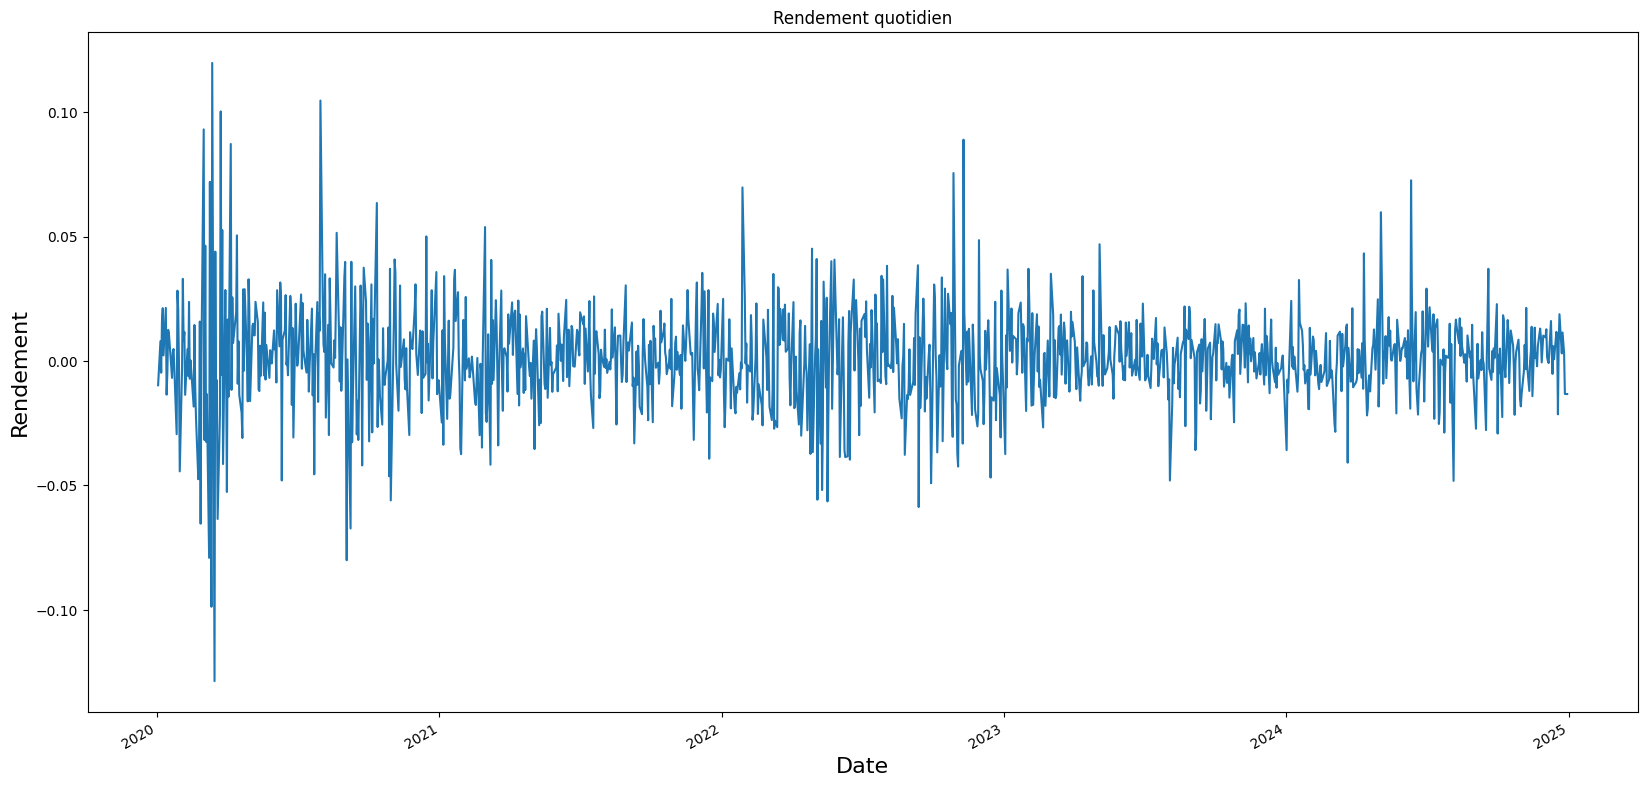

In [1168]:
plt.figure(figsize=(20,10))
apple["DailyReturn_pct_change"].plot(title="Rendement quotidien")
plt.ylabel("Rendement", fontsize=16)
plt.xlabel("Date", fontsize=16)

In [1169]:
# !pip install plotly

In [ ]:
# Package qui permet d'avoir des graphiques dynamiques et qui permettent d'aller plus rapidement : Plotly
import plotly.express as px
import plotly.io as pio

In [ ]:
# Voir les renderers disponibles
print(pio.renderers)

pio.renderers.default = "vscode"  # très fiable pour notebook

Renderers configuration
-----------------------
    Default renderer: 'vscode'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']



In [1172]:
fig = px.line(apple, 
              x = apple.index, 
              y = "DailyReturn_pct_change", 
              title="Rendement quotidien (pct_change) avec Plotly")
fig.show()

Text(0.5, 1.0, 'Histogramme des rendements')

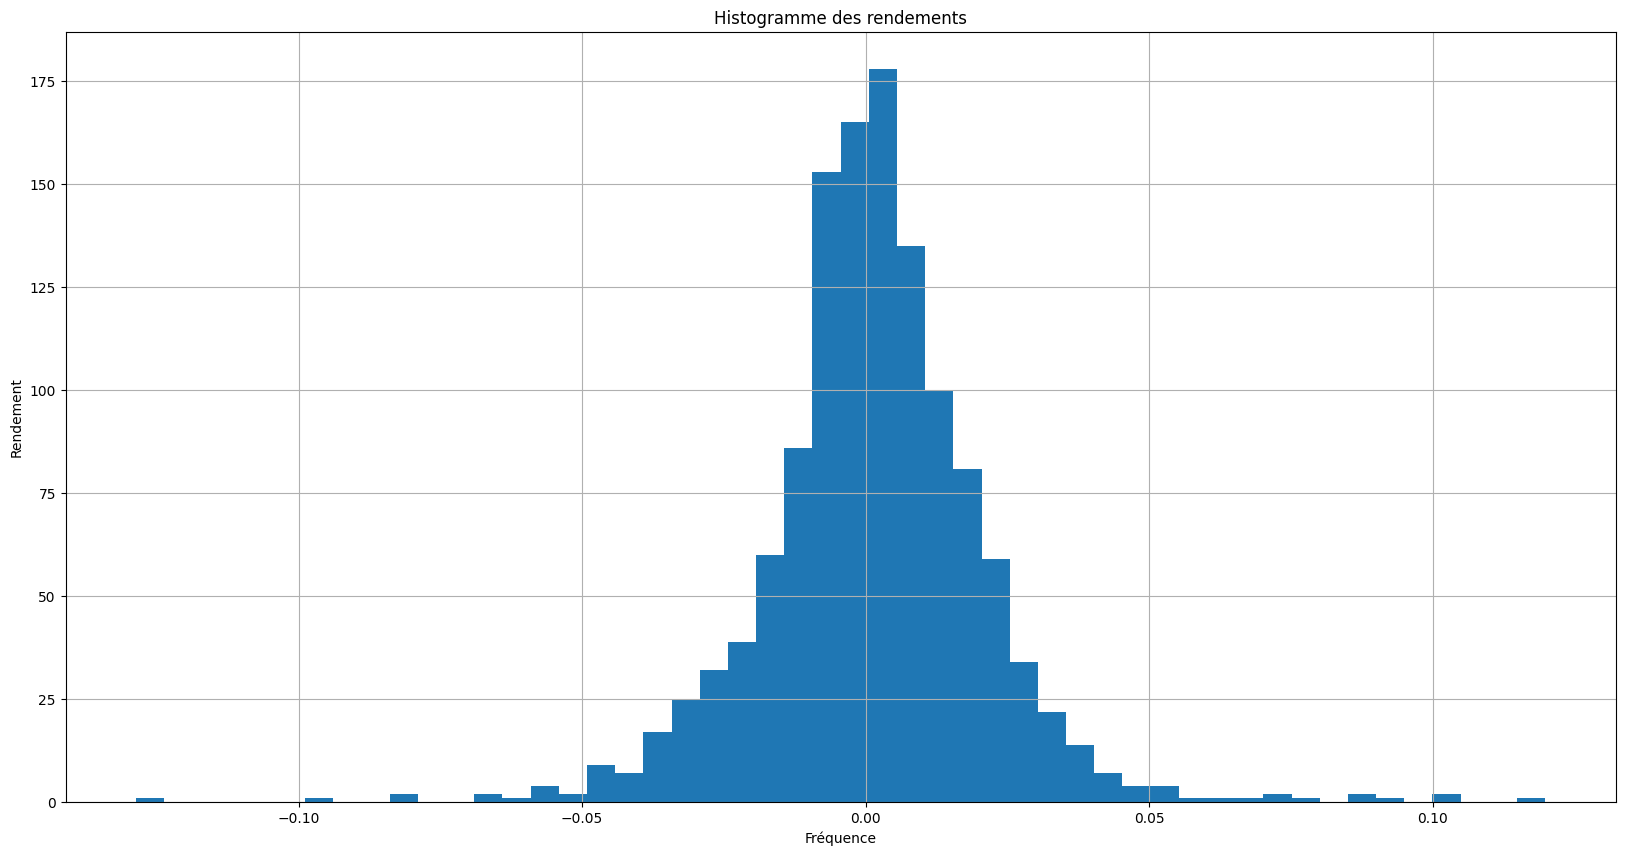

In [1173]:
# Faire l'histogramme
plt.figure(figsize=(20,10))
apple["DailyReturn_pct_change"].hist(bins=50)
plt.ylabel("Rendement")
plt.xlabel("Fréquence")
plt.title("Histogramme des rendements")

4. **Mesurer et analyser les rendements cumulés**

Le **rendement cumulé** mesure la performance globale d'un actif dans le temps. Il permet d'observer l'effet composé des rendements successifs/

**Formule**

$$ RC_t = \prod_{i=1}^t(1 + R_i) $$

Où :

- $R_t$ est le rendement cumulé jusqu'au jour $t$

- R_i est le rendement du jour $i$

Cela donne une vue d'ensemble de la croissance ou décroissance d'un actif sur une période donnée.

In [1174]:
apple["CumulativeReturn"] = (1 + apple["DailyReturn_manual"]).cumprod()

In [1175]:
apple

Price,Close,High,Low,Open,Volume,Close_tminus1,DailyReturn_manual,DailyReturn_pct_change,diff,CumulativeReturn
Date,,,,,,,,,,
2020-01-02,72.538513,72.598892,71.292304,71.545890,135480400,NaN,NaN,NaN,NaN,NaN
2020-01-03,71.833298,72.594063,71.608692,71.765674,146322800,72.538513,-0.009722,-0.009722,-3.469447e-18,0.990278
2020-01-06,72.405655,72.444298,70.702990,70.954166,118387200,71.833298,0.007968,0.007968,-3.816392e-17,0.998168
2020-01-07,72.065140,72.671333,71.845362,72.415330,108872000,72.405655,-0.004703,-0.004703,2.949030e-17,0.993474
2020-01-08,73.224411,73.526303,71.768086,71.768086,132079200,72.065140,0.016086,0.016086,-2.428613e-17,1.009456
...,...,...,...,...,...,...,...,...,...,...
2024-12-23,254.367035,254.745680,252.553466,253.868804,40858800,253.589798,0.003065,0.003065,-1.040834e-16,3.506648
2024-12-24,257.286682,257.296626,254.386957,254.586262,23234700,254.367035,0.011478,0.011478,8.326673e-17,3.546898
2024-12-26,258.103729,259.179926,256.718662,257.276679,27237100,257.286682,0.003176,0.003176,-4.336809e-17,3.558161


Visualisation

Text(0.5, 0, 'Date')

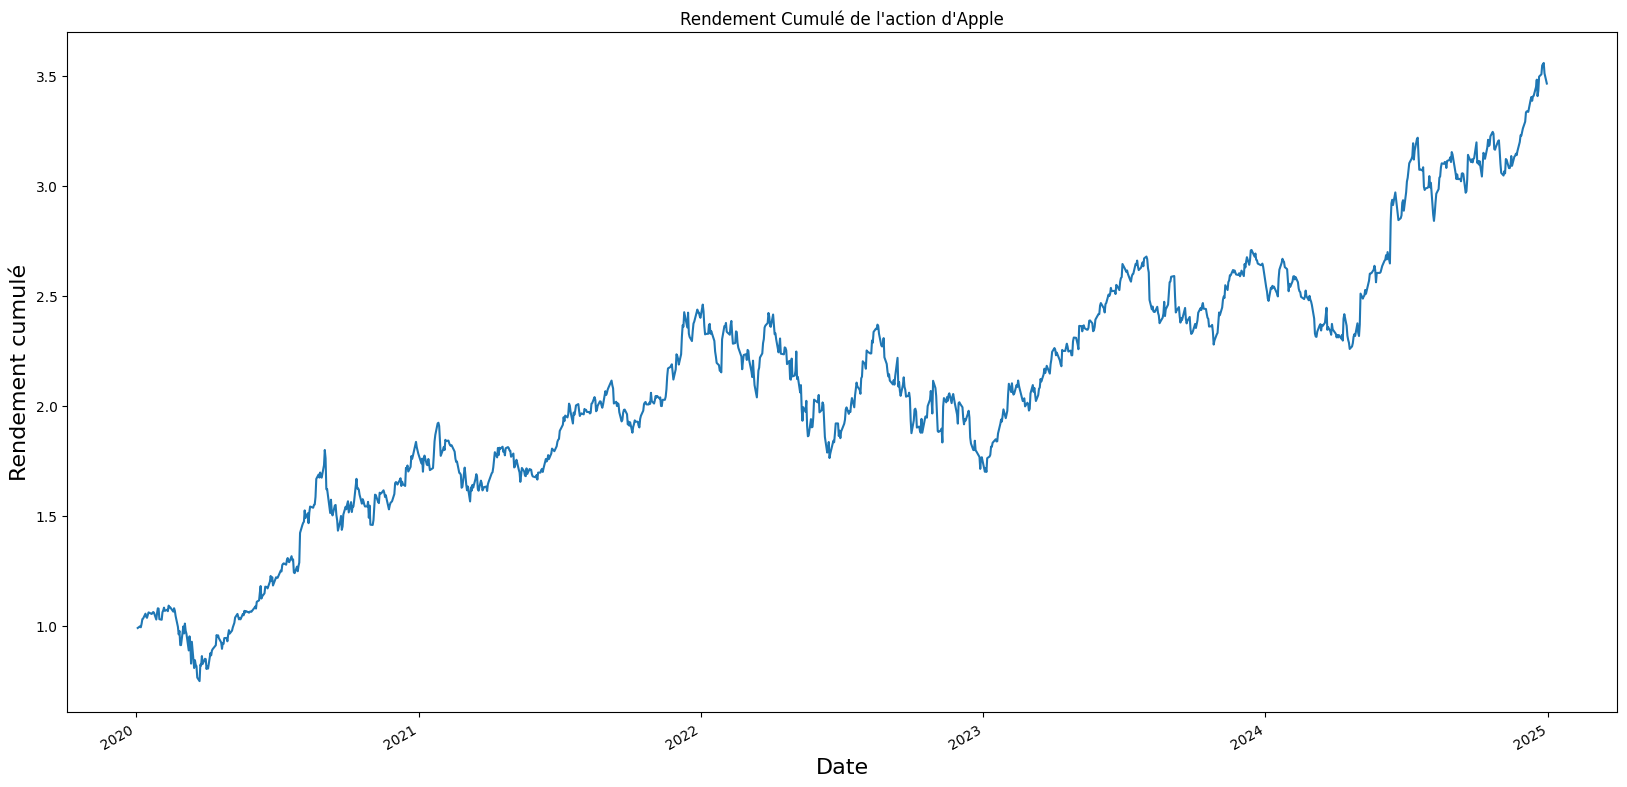

In [1176]:
plt.figure(figsize=(20,10))
apple["CumulativeReturn"].plot(title="Rendement Cumulé de l'action d'Apple")
plt.ylabel("Rendement cumulé", fontsize=16)
plt.xlabel("Date", fontsize=16)

In [1177]:
fig = px.line(apple, x = apple.index, y = "CumulativeReturn", title="Rendement cumulé de l'action d'Apple avec Plotly")
fig

5. **Mesurer et interpréter la volatilité**

La **volatilité** mesure l'ampleur des fluctuations du rendement d'un actif. C'est un indicateur clé du **risque** finacier: plus elle est élevée, plus l'actif est instable.

$$ \sigma_t = \sqrt{\frac{1}{N-1}\sum_{i=1}^N(R_i - \bar{R})^2} $$

Où :

- $\sigma_t$ est la volatilité à l'instant $t$

- $R_i$ les rendements observés

- $\bar{R}$ la moyenne des rendements

- $N$ est le nombre de période consédérer dans le calcul

La volatilité calculée à partir des rendements journaliers donne une vision du risque à **court terme**.

Cependant, les investisseurs et analystes raisonnent souvent à l'**année**.

Pour rendre la volatilité **comparable** à d'autres actifs ou périodes, on l'**annualise**.

On utilise généralement la racine du nombre de jours de bourse par an ($\sim$ 252):

$$\sigma_{\text{annuelle}} = \sigma_{\text{journaliere}}*\sqrt{252} $$

Cela permet d'exprimer la volatilité sous forme de **pourcentage annuel**, ce qui est plus parlant dans un contexte d'investissement.

NB : 21 jours corresponds à peu près à 1 mois de bourse.

In [1178]:
apple["volatility_daily"] = apple["DailyReturn_pct_change"].rolling(window=21).std() # la volatilité sur les 21 jours

In [1179]:
apple.tail()

Price,Close,High,Low,Open,Volume,Close_tminus1,DailyReturn_manual,DailyReturn_pct_change,diff,CumulativeReturn,volatility_daily
Date,,,,,,,,,,,
2024-12-23,254.367035,254.745680,252.553466,253.868804,40858800,253.589798,0.003065,0.003065,-1.040834e-16,3.506648,0.008669
2024-12-24,257.286682,257.296626,254.386957,254.586262,23234700,254.367035,0.011478,0.011478,8.326673e-17,3.546898,0.008772
2024-12-26,258.103729,259.179926,256.718662,257.276679,27237100,257.286682,0.003176,0.003176,-4.336809e-17,3.558161,0.008616
2024-12-27,254.685883,257.784897,252.164833,256.917949,42355300,258.103729,-0.013242,-0.013242,-2.255141e-17,3.511044,0.009431
2024-12-30,251.307861,252.603266,249.862994,251.337754,35557500,254.685883,-0.013263,-0.013263,-8.673617e-18,3.464475,0.010123


In [1180]:
import math

**Annualiser la volatilité** 

In [1181]:
apple["volatility_annualize"] = apple["volatility_daily"]*math.sqrt(252)

In [1182]:
apple.tail()

Price,Close,High,Low,Open,Volume,Close_tminus1,DailyReturn_manual,DailyReturn_pct_change,diff,CumulativeReturn,volatility_daily,volatility_annualize
Date,,,,,,,,,,,,
2024-12-23,254.367035,254.745680,252.553466,253.868804,40858800,253.589798,0.003065,0.003065,-1.040834e-16,3.506648,0.008669,0.137616
2024-12-24,257.286682,257.296626,254.386957,254.586262,23234700,254.367035,0.011478,0.011478,8.326673e-17,3.546898,0.008772,0.139258
2024-12-26,258.103729,259.179926,256.718662,257.276679,27237100,257.286682,0.003176,0.003176,-4.336809e-17,3.558161,0.008616,0.136768
2024-12-27,254.685883,257.784897,252.164833,256.917949,42355300,258.103729,-0.013242,-0.013242,-2.255141e-17,3.511044,0.009431,0.149709
2024-12-30,251.307861,252.603266,249.862994,251.337754,35557500,254.685883,-0.013263,-0.013263,-8.673617e-18,3.464475,0.010123,0.160691


In [1183]:
apple["volatility_daily"].mean()*100

np.float64(1.8133434567699978)

In [1184]:
apple["volatility_annualize"].mean()*100

np.float64(28.78593496895771)

6. **Visualisaer la volatilité**

Text(0.5, 0, 'Date')

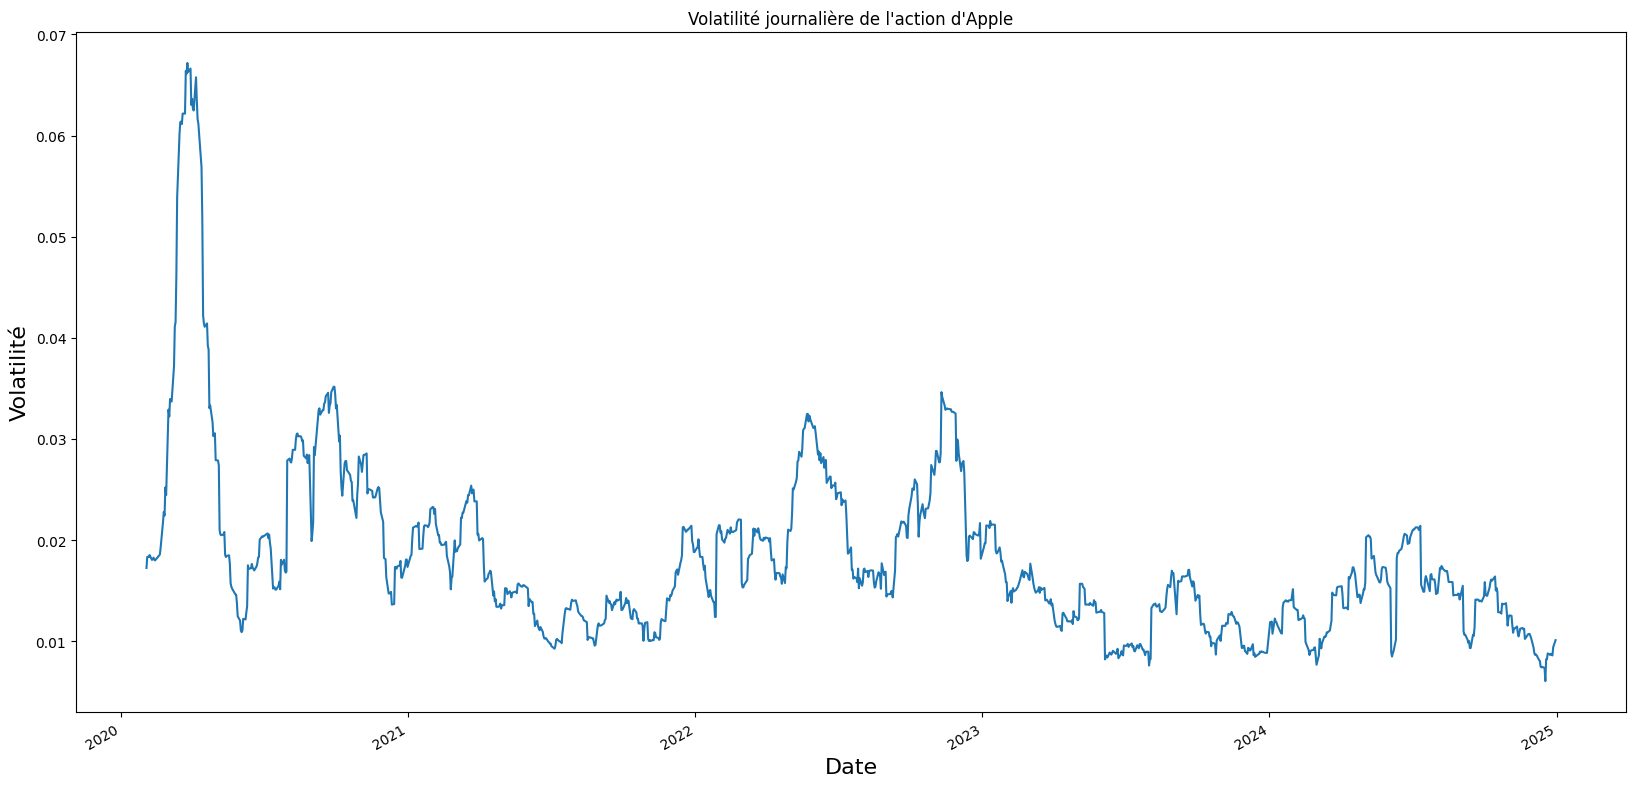

In [1185]:
# Visualisation
plt.figure(figsize=(20,10))
apple["volatility_daily"].plot(title="Volatilité journalière de l'action d'Apple")
plt.ylabel("Volatilité", fontsize=16)
plt.xlabel("Date", fontsize=16)

In [1186]:
fig = px.line(apple, x = apple.index, y= "volatility_daily", title= "Volatilité de l'action d'Apple avec plotly")
fig

In [1187]:
fig = px.line(apple, x = apple.index, y ="volatility_annualize", title="Volatilité annulisée de l'action d'Apple avec plotly")
fig

**Défi** : Analyser les rendements et la volatilité

- Importer le cours de l'action NVIDIA (ticker=NVDA) entre 2020 et 2024

- Calculer la volatilité glissante sur 60 jours

- Calculer la volatilité annualisée

- Décrire et visualiser l'évolution de la volatilité annualisée

In [1188]:
1. 
import yfinance as yf
import pandas as pd
import plotly.express as px
import math
import matplotlib.pyplot as plt


In [1189]:
nvidia = yf.download("NVDA", start="2020-01-01", end="2024-12-31")

[*********************100%***********************]  1 of 1 completed


In [1190]:
nvidia.head()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2020-01-02,5.971410,5.971410,5.892010,5.942537,237536000
2020-01-03,5.875832,5.919639,5.826798,5.851689,205384000
2020-01-06,5.900473,5.905700,5.756359,5.782493,262636000
2020-01-07,5.971908,6.017706,5.883796,5.928847,314856000
2020-01-08,5.983108,6.024425,5.927603,5.967676,277108000


In [1191]:
nvidia.columns = nvidia.columns.droplevel("Ticker")

In [1192]:
nvidia.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,5.971410,5.971410,5.892010,5.942537,237536000
2020-01-03,5.875832,5.919639,5.826798,5.851689,205384000
2020-01-06,5.900473,5.905700,5.756359,5.782493,262636000
2020-01-07,5.971908,6.017706,5.883796,5.928847,314856000
2020-01-08,5.983108,6.024425,5.927603,5.967676,277108000


In [1193]:
nvidia.describe()

Price,Close,High,Low,Open,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,38.361343,39.069100,37.586979,38.362776,4.470044e+08
std,38.144986,38.851310,37.397751,38.198954,1.875881e+08
min,4.891362,5.228577,4.499854,4.983511,9.788400e+07
25%,13.569347,13.821396,13.331015,13.598518,3.088640e+08
50%,21.221699,21.724462,20.791343,21.163799,4.205910e+08
75%,45.554153,46.190774,44.892842,45.692072,5.470070e+08
max,148.837341,152.846179,146.218044,149.307200,1.543911e+09


In [1194]:
nvidia.isnull().mean()

Price
Close     0.0
High      0.0
Low       0.0
Open      0.0
Volume    0.0
dtype: float64

In [1195]:
# 2.

# Calcul du rendement journalière avec la méthode pct_change
nvidia["NVD_DailyReturn_pct_change"] = nvidia["Close"].pct_change()

In [1196]:
nvidia.head()

Price,Close,High,Low,Open,Volume,NVD_DailyReturn_pct_change
Date,,,,,,
2020-01-02,5.971410,5.971410,5.892010,5.942537,237536000,NaN
2020-01-03,5.875832,5.919639,5.826798,5.851689,205384000,-0.016006
2020-01-06,5.900473,5.905700,5.756359,5.782493,262636000,0.004194
2020-01-07,5.971908,6.017706,5.883796,5.928847,314856000,0.012107
2020-01-08,5.983108,6.024425,5.927603,5.967676,277108000,0.001875


In [1197]:
# Calcul de la volatilité sous 60 jours
nvidia["NVD_volatility_daily"] = nvidia["NVD_DailyReturn_pct_change"].rolling(window=60).std() # la volatilité sur les 60 jours de l'action NVIDIA

In [1198]:
nvidia.head(70)

Price,Close,High,Low,Open,Volume,NVD_DailyReturn_pct_change,NVD_volatility_daily
Date,,,,,,,
2020-01-02,5.971410,5.971410,5.892010,5.942537,237536000,NaN,NaN
2020-01-03,5.875832,5.919639,5.826798,5.851689,205384000,-0.016006,NaN
2020-01-06,5.900473,5.905700,5.756359,5.782493,262636000,0.004194,NaN
2020-01-07,5.971908,6.017706,5.883796,5.928847,314856000,0.012107,NaN
2020-01-08,5.983108,6.024425,5.927603,5.967676,277108000,0.001875,NaN
...,...,...,...,...,...,...,...
2020-04-06,6.684527,6.721387,6.299245,6.356776,727884000,0.100406,0.057796
2020-04-07,6.451167,6.929843,6.408081,6.906183,784520000,-0.034911,0.058006
2020-04-08,6.648416,6.673321,6.490268,6.560251,542444000,0.030576,0.057999


In [1199]:
# 3.
# Volatilié annualisée
nvidia["NVD_volatility_annualized"] = nvidia["NVD_volatility_daily"]*math.sqrt(252)

In [1200]:
nvidia.head(70)

Price,Close,High,Low,Open,Volume,NVD_DailyReturn_pct_change,NVD_volatility_daily,NVD_volatility_annualized
Date,,,,,,,,
2020-01-02,5.971410,5.971410,5.892010,5.942537,237536000,NaN,NaN,NaN
2020-01-03,5.875832,5.919639,5.826798,5.851689,205384000,-0.016006,NaN,NaN
2020-01-06,5.900473,5.905700,5.756359,5.782493,262636000,0.004194,NaN,NaN
2020-01-07,5.971908,6.017706,5.883796,5.928847,314856000,0.012107,NaN,NaN
2020-01-08,5.983108,6.024425,5.927603,5.967676,277108000,0.001875,NaN,NaN
...,...,...,...,...,...,...,...,...
2020-04-06,6.684527,6.721387,6.299245,6.356776,727884000,0.100406,0.057796,0.917489
2020-04-07,6.451167,6.929843,6.408081,6.906183,784520000,-0.034911,0.058006,0.920813
2020-04-08,6.648416,6.673321,6.490268,6.560251,542444000,0.030576,0.057999,0.920711


In [1201]:
nvidia.NVD_volatility_annualized.describe()

count    1197.000000
mean        0.523727
std         0.139267
min         0.296726
25%         0.404083
50%         0.514824
75%         0.614838
max         0.946723
Name: NVD_volatility_annualized, dtype: float64

In [1202]:
fig = px.line(nvidia, x=nvidia.index, y="NVD_volatility_annualized", title="Volatilité annualisée de l'action de NVIDIA")
fig

# 4 Maîtiser les moyennes mobiles en finance

**Objectifs** 

- Calculer des moyennes mobiles simples (SMA) et exponentielles (EMA) avec pandas

- Visualiser les tendances à l'aide de `matplotlib`

1. **Importer les données d'Apple**

Les moyennes mobiles sont des indicateurs calculés à partir du prix d'un actif sur une période donnée. Pour les utiliser, il est essentiel de disposer d'un historique de prix suffisament long. Ici, nous utiliserons les données de l'action Apple (AAPL).

In [1203]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [1204]:
apple = yf.download("AAPL", start="2021-01-01", end="2024-12-31")

[*********************100%***********************]  1 of 1 completed


In [1205]:
apple.columns = apple.columns.droplevel("Ticker")

In [1206]:
apple.isnull().mean()

Price
Close     0.0
High      0.0
Low       0.0
Open      0.0
Volume    0.0
dtype: float64

In [1207]:
apple.dropna(inplace=True)

In [1208]:
apple.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2021-01-04,126.096581,130.189040,123.514430,130.101348,143301900
2021-01-05,127.655640,128.366960,125.141696,125.589924,97664900
2021-01-06,123.358536,127.694603,123.144167,124.449862,155088000
2021-01-07,127.567909,128.259737,124.586260,125.073458,109578200
2021-01-08,128.668976,129.234127,126.895568,129.039236,105158200


In [1209]:
apple.describe()

Price,Close,High,Low,Open,Volume
count,1004.000000,1004.000000,1004.000000,1004.000000,1.004000e+03
mean,166.625568,168.213098,164.845331,166.448987,7.374007e+07
std,31.294908,31.331018,31.140717,31.207064,3.015727e+07
min,113.550148,117.492588,113.403769,116.155649,2.323470e+07
25%,143.151901,144.798221,141.613369,142.970391,5.224162e+07
50%,163.541389,165.784778,162.361211,163.907421,6.803675e+07
75%,183.336948,184.941329,181.914847,183.480119,8.860770e+07
max,258.103729,259.179926,256.718662,257.276679,3.186799e+08


2. **Calculer une moyenne mobile simple (SMA)**

La SMA (Simple Moving Average) est la moyenne arithmétique des prix de clôture sur une période donnée. Elle est utile pour lisser les variations de prix et identifier les tendances de fond.

On souhaite lissez les variations de prix car lorsqu'on analyse la série de prix elle peut affecter par des fluctuations qui empêchent de voir la dynamique de long terme. Raisons pour laquelle on va calculer des moyennes mobiles qui vont lisser la série et permettre d'identifier la dynamique de long terme.

$$ SMA_t = \frac{1}{n} \sum_{i=0}^{n-1} P_{t-i} $$

Où :

- $SMA_t$ est la moyenne mobile simple à la date $t$

- $n$ est la période (ex. 20 jours)

- $P_{t-i}$ est le prix de clôture à $t-i$

In [1210]:
apple["SMA_20"] = apple["Close"].rolling(window=20).mean()

In [1211]:
apple.head(30)

Price,Close,High,Low,Open,Volume,SMA_20
Date,,,,,,
2021-01-04,126.096581,130.189040,123.514430,130.101348,143301900,NaN
2021-01-05,127.655640,128.366960,125.141696,125.589924,97664900,NaN
2021-01-06,123.358536,127.694603,123.144167,124.449862,155088000,NaN
2021-01-07,127.567909,128.259737,124.586260,125.073458,109578200,NaN
2021-01-08,128.668976,129.234127,126.895568,129.039236,105158200,NaN
2021-01-11,125.677574,126.837108,125.209868,125.882204,100384500,NaN
2021-01-12,125.502220,126.369432,123.611889,125.209898,91951100,NaN
2021-01-13,127.538681,128.084340,125.200137,125.463213,88636800,NaN
2021-01-14,125.609398,127.645882,125.463230,127.451006,90221800,NaN


In [1212]:
apple["SMA_10"] = apple["Close"].rolling(window=10).mean()

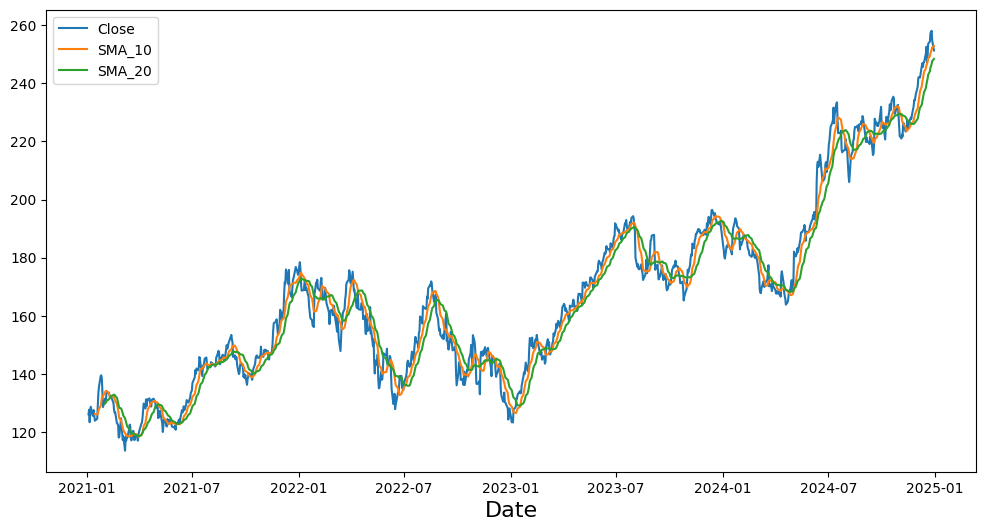

In [1213]:
plt.figure(figsize=(12, 6))
plt.plot(apple["Close"], label = "Close")
plt.plot(apple["SMA_10"], label = "SMA_10")
plt.plot(apple["SMA_20"], label = "SMA_20")
plt.xlabel("Date", fontsize=16)
plt.legend()

**SMA** accorde la même pondération à toutes les observations alors qu'en réalité, pour mieux lisser une série, on peut avoir besoin de donner plus de pondération aux observations récentes. Raison pour laquelle on va maintenant parler de moyenne mobile exponentielle **EMA** qui donne plus de poids aux prix recents, ce qui permet de réagir plus rapidement aux changements de tendances comparativement à la moyenne mobile simple.

3. **Calculer une moyenne mobile exponenetielle (EMA)**

L'EMA (Exponenetial Moving Average) donne plus de poids aux prix récents. Elle réagit plus rapidement aux changements de tendances que la SMA.

In [ ]:
#Ce qui nous itéresse dans le calcul de EMA  est le paramètre alpha  représente le dégré d'importance accordée aux prix récents. 
# plus alpha est élevé plus les prix récents ont de l'impacts

apple["EMA"] = apple["Close"].ewm(alpha=0.8).mean()

In [1215]:
apple.head()

Price,Close,High,Low,Open,Volume,SMA_20,SMA_10,EMA
Date,,,,,,,,
2021-01-04,126.096581,130.189040,123.514430,130.101348,143301900,NaN,NaN,126.096581
2021-01-05,127.655640,128.366960,125.141696,125.589924,97664900,NaN,NaN,127.395796
2021-01-06,123.358536,127.694603,123.144167,124.449862,155088000,NaN,NaN,124.139941
2021-01-07,127.567909,128.259737,124.586260,125.073458,109578200,NaN,NaN,126.886710
2021-01-08,128.668976,129.234127,126.895568,129.039236,105158200,NaN,NaN,128.312979


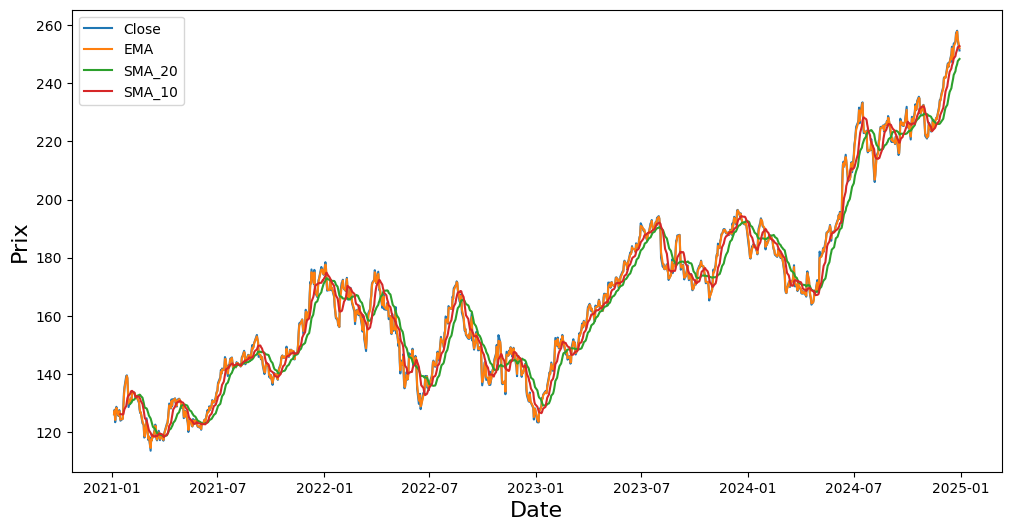

In [1216]:
# Visualisation de la tendance
plt.figure(figsize=(12, 6))
plt.plot(apple["Close"], label="Close")
plt.plot(apple["EMA"], label="EMA")
plt.plot(apple["SMA_20"], label="SMA_20")
plt.plot(apple["SMA_10"], label="SMA_10")
plt.xlabel("Date", fontsize=16)
plt.ylabel("Prix", fontsize=16)
plt.legend()

**Défi** : Maîtriser les moyennes mobiles en finance

- Déterminer la moyenne mobile sur $50$ jours (SMA_50) et sur 200 jours (SMA_200) à partir du cours de clôture d'une action de votre choix.

- Tracer sur un même graphique l'évolution des deux moyennes mobiles afin de visualiser la tendance.



In [1217]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [1218]:
tesla = yf.download("TSLA", start="2021-01-01", end="2024-12-31")

[*********************100%***********************]  1 of 1 completed


In [1219]:
tesla.columns = tesla.columns.droplevel("Ticker")

In [1220]:
tesla.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2021-01-04,243.256668,248.163330,239.063339,239.820007,145914600
2021-01-05,245.036667,246.946671,239.733337,241.220001,96735600
2021-01-06,251.993332,258.000000,249.699997,252.830002,134100000
2021-01-07,272.013336,272.329987,258.399994,259.209991,154496700
2021-01-08,293.339996,294.829987,279.463318,285.333344,225166500


In [1221]:
tesla.isnull().mean()

Price
Close     0.0
High      0.0
Low       0.0
Open      0.0
Volume    0.0
dtype: float64

In [1222]:
tesla.dropna(inplace=True)

In [1223]:
tesla["SMA_50"] = tesla["Close"].rolling(window=50).mean()

In [1224]:
tesla.tail()

Price,Close,High,Low,Open,Volume,SMA_50
Date,,,,,,
2024-12-23,430.600006,434.510010,415.410004,431.000000,72698100,324.8296
2024-12-24,462.279999,462.779999,435.140015,435.899994,59551800,329.6920
2024-12-26,454.130005,465.329987,451.019989,465.160004,76366400,334.3832
2024-12-27,431.660004,450.000000,426.500000,449.519989,82666800,338.5898
2024-12-30,417.410004,427.000000,415.750000,419.399994,64941000,342.5202


In [1225]:
tesla["SMA_200"] = tesla["Close"].rolling(window=200).mean()

In [1226]:
tesla.tail()

Price,Close,High,Low,Open,Volume,SMA_50,SMA_200
Date,,,,,,,
2024-12-23,430.600006,434.510010,415.410004,431.000000,72698100,324.8296,232.24500
2024-12-24,462.279999,462.779999,435.140015,435.899994,59551800,329.6920,233.66755
2024-12-26,454.130005,465.329987,451.019989,465.160004,76366400,334.3832,235.05050
2024-12-27,431.660004,450.000000,426.500000,449.519989,82666800,338.5898,236.36140
2024-12-30,417.410004,427.000000,415.750000,419.399994,64941000,342.5202,237.63595


In [1227]:
tesla["EMA_alpha0.7"] = tesla["Close"].ewm(alpha=0.7).mean()

In [1228]:
tesla.tail()

Price,Close,High,Low,Open,Volume,SMA_50,SMA_200,EMA_alpha0.7
Date,,,,,,,,
2024-12-23,430.600006,434.510010,415.410004,431.000000,72698100,324.8296,232.24500,429.462111
2024-12-24,462.279999,462.779999,435.140015,435.899994,59551800,329.6920,233.66755,452.434633
2024-12-26,454.130005,465.329987,451.019989,465.160004,76366400,334.3832,235.05050,453.621393
2024-12-27,431.660004,450.000000,426.500000,449.519989,82666800,338.5898,236.36140,438.248421
2024-12-30,417.410004,427.000000,415.750000,419.399994,64941000,342.5202,237.63595,423.661529


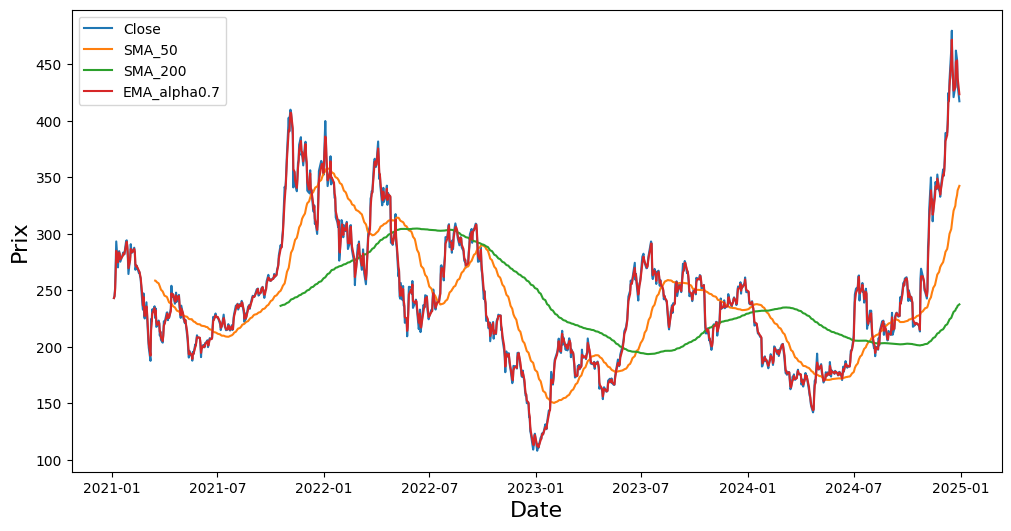

In [1229]:
plt.figure(figsize=(12,6))
plt.plot(tesla["Close"], label="Close")
plt.plot(tesla["SMA_50"], label="SMA_50")
plt.plot(tesla["SMA_200"], label="SMA_200")
plt.plot(tesla["EMA_alpha0.7"], label="EMA_alpha0.7")
plt.xlabel("Date", fontsize=16)
plt.ylabel("Prix", fontsize = 16)
plt.legend()

# 5 Maîtriser l'analyse technique en python

**Objectif**

- Comprendre le rôle des indicateurs techniques dans la lecture des tendances

- Mettre en oeuvre les principaux indicateurs en python : RSU, MACD, OBV, A/D, CMF

- Visualiser les signaux de surachat, survente, accumulation et distribution

- Interprèter graphiquement les divergencesentre prix et volume

- Créer un script python d'analyse technique applicable à n'importe quel actif

In [1230]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [1231]:
apple = yf.download("AAPL", start="2020-01-01", end="2024-12-31")

[*********************100%***********************]  1 of 1 completed


In [1232]:
apple.columns = apple.columns.droplevel("Ticker")

In [1233]:
apple.dropna(inplace=True)

In [1234]:
apple.tail()

Price,Close,High,Low,Open,Volume
Date,,,,,
2024-12-23,254.367035,254.745680,252.553466,253.868804,40858800
2024-12-24,257.286682,257.296626,254.386957,254.586262,23234700
2024-12-26,258.103729,259.179926,256.718662,257.276679,27237100
2024-12-27,254.685883,257.784897,252.164833,256.917949,42355300
2024-12-30,251.307861,252.603266,249.862994,251.337754,35557500


1 **Calculer et interprèter le RSI**

Le **RSI (Relative Strength Index)** est un idicateur de momentum qui mesure la vitesse et l'amplitude des variations de prix.

Il oscille entre $0$ et $100$ et permet d'identifier des situations de :

- **Surachat** : RSI > 70

- **Survente** : RSI < 30

$$RSI = 100 - \left(\frac{100}{1 + RS}\right)$$

avec 

$$ RS = \frac{\text{Moyenne des gains sur n périodes}}{\text{Moyenne des pertes sur n périodes}} $$

**Interprétation** :

- RSI > 70 : actif potentiellement surachetée, attention à un repli

- RSI < 30 : actif potentiellement survendu, possible rebond

Le RSI est souvent utilisé avec une période de **14 jours**

In [1235]:
# Calcul de la différence des prix entre la date t et la date t-1
apple["diff"] = apple["Close"].diff()

In [1236]:
apple.head()

Price,Close,High,Low,Open,Volume,diff
Date,,,,,,
2020-01-02,72.538513,72.598892,71.292304,71.545890,135480400,NaN
2020-01-03,71.833298,72.594063,71.608692,71.765674,146322800,-0.705215
2020-01-06,72.405655,72.444298,70.702990,70.954166,118387200,0.572357
2020-01-07,72.065140,72.671333,71.845362,72.415330,108872000,-0.340515
2020-01-08,73.224411,73.526303,71.768086,71.768086,132079200,1.159271


In [1237]:
apple["gain"] = apple["diff"].apply(lambda x: x if x>0 else 0)
apple["loss"] = apple["diff"].apply(lambda x: -x if x<0 else 0)

In [1238]:
apple.head()

Price,Close,High,Low,Open,Volume,diff,gain,loss
Date,,,,,,,,
2020-01-02,72.538513,72.598892,71.292304,71.545890,135480400,NaN,0.000000,0.000000
2020-01-03,71.833298,72.594063,71.608692,71.765674,146322800,-0.705215,0.000000,0.705215
2020-01-06,72.405655,72.444298,70.702990,70.954166,118387200,0.572357,0.572357,0.000000
2020-01-07,72.065140,72.671333,71.845362,72.415330,108872000,-0.340515,0.000000,0.340515
2020-01-08,73.224411,73.526303,71.768086,71.768086,132079200,1.159271,1.159271,0.000000


In [1239]:
# Période du RSI
window = 14


In [1240]:
# Moyenne mobile simple sur window jours (on peut aussi utiliser ewm)

apple[f"avg_gain_{window}"] = apple["gain"].rolling(window=window).mean()
apple[f"avg_loss_{window}"] = apple["loss"].rolling(window=window).mean()

In [1241]:
apple.tail()

Price,Close,High,Low,Open,Volume,diff,gain,loss,avg_gain_14,avg_loss_14
Date,,,,,,,,,,
2024-12-23,254.367035,254.745680,252.553466,253.868804,40858800,0.777237,0.777237,0.000000,1.390066,0.491825
2024-12-24,257.286682,257.296626,254.386957,254.586262,23234700,2.919647,2.919647,0.000000,1.572988,0.491825
2024-12-26,258.103729,259.179926,256.718662,257.276679,27237100,0.817047,0.817047,0.000000,1.629215,0.491825
2024-12-27,254.685883,257.784897,252.164833,256.917949,42355300,-3.417847,0.000000,3.417847,1.629215,0.721721
2024-12-30,251.307861,252.603266,249.862994,251.337754,35557500,-3.378021,0.000000,3.378021,1.350916,0.963008


In [1242]:
# Calcul de l'indicateur RS (Relative Strength)

apple["rs"] = apple[f"avg_gain_{window}"]/apple[f"avg_loss_{window}"] 


In [1243]:
apple.tail()

Price,Close,High,Low,Open,Volume,diff,gain,loss,avg_gain_14,avg_loss_14,rs
Date,,,,,,,,,,,
2024-12-23,254.367035,254.745680,252.553466,253.868804,40858800,0.777237,0.777237,0.000000,1.390066,0.491825,2.826345
2024-12-24,257.286682,257.296626,254.386957,254.586262,23234700,2.919647,2.919647,0.000000,1.572988,0.491825,3.198271
2024-12-26,258.103729,259.179926,256.718662,257.276679,27237100,0.817047,0.817047,0.000000,1.629215,0.491825,3.312593
2024-12-27,254.685883,257.784897,252.164833,256.917949,42355300,-3.417847,0.000000,3.417847,1.629215,0.721721,2.257402
2024-12-30,251.307861,252.603266,249.862994,251.337754,35557500,-3.378021,0.000000,3.378021,1.350916,0.963008,1.402808


In [1244]:
# Calcul du RSI

apple["RSI"] = 100 - (100/(1 + apple["rs"]))

In [1245]:
apple.tail()

Price,Close,High,Low,Open,Volume,diff,gain,loss,avg_gain_14,avg_loss_14,rs,RSI
Date,,,,,,,,,,,,
2024-12-23,254.367035,254.745680,252.553466,253.868804,40858800,0.777237,0.777237,0.000000,1.390066,0.491825,2.826345,73.865399
2024-12-24,257.286682,257.296626,254.386957,254.586262,23234700,2.919647,2.919647,0.000000,1.572988,0.491825,3.198271,76.180671
2024-12-26,258.103729,259.179926,256.718662,257.276679,27237100,0.817047,0.817047,0.000000,1.629215,0.491825,3.312593,76.812095
2024-12-27,254.685883,257.784897,252.164833,256.917949,42355300,-3.417847,0.000000,3.417847,1.629215,0.721721,2.257402,69.300689
2024-12-30,251.307861,252.603266,249.862994,251.337754,35557500,-3.378021,0.000000,3.378021,1.350916,0.963008,1.402808,58.382033


In [1246]:
apple.RSI.describe()

count    1244.000000
mean       54.989776
std        17.233598
min         3.180040
25%        42.579666
50%        55.840694
75%        68.366683
max        96.162916
Name: RSI, dtype: float64

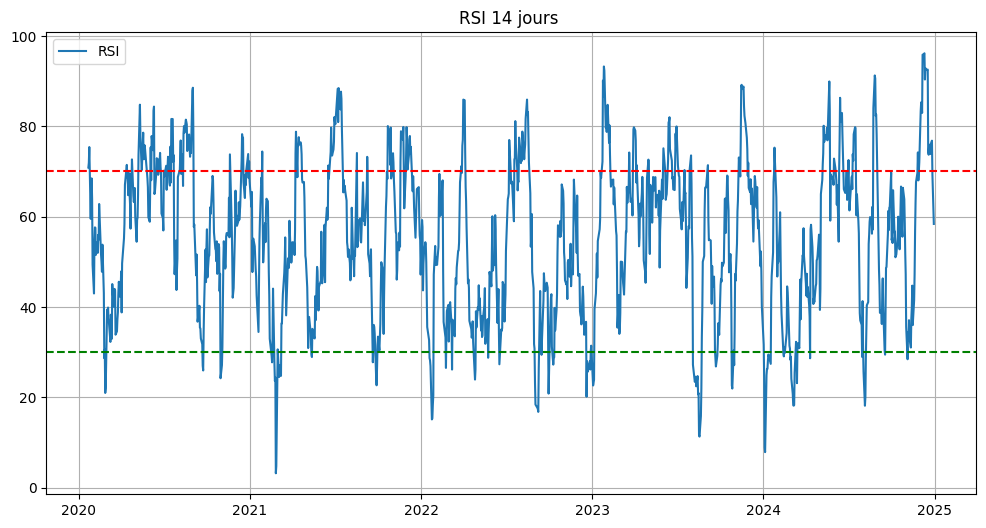

In [1247]:
plt.figure(figsize=(12, 6))
plt.plot(apple["RSI"], label = "RSI")
plt.axhline(70, color="red", linestyle="--")
plt.axhline(30, color="green", linestyle="--")
plt.title(f"RSI {window} jours ")
plt.grid()
plt.legend()

3. **Analyse la tendance avec MACD**

Le MACD (**Moving Average Convergence Divergence**) est un indicateur technique très populaire qui permet de suivre la **dynamique d'un actif**. Il est basé sur la différence entre deux **moyennes mobiles exponentielles** (EMA), généralement à 12 et 26 périodes.

**À quoi sert le MACD ?**

- Identifier les **changements dynamiques** du marché

- Repérer les **points d'entrée et de sortie**

- Visualiser le **momemtum** (accélération/décélération d'une tendance)

- Confirmer ou invalider un signal donné par le prix seul

**Composantes du MACD**

1. **EMA 12** : moeyenne mobile exponentielle des 12 dernières clôtures -> représente le **prix moyen à court terme**

2. **EMA 26** : moyenne mobile exponenetielle des 26 dernières clôtures -> représente le **prix moyen  à long terme**

3. **MACD Line** : différence entre EMA 12 et EMA 26 -> met en évidence les divergences de momentum

4. **Signal Line** : EMA de la MACD sur 9 périodes -> permet de lisser les variations de l'indicateur MACD

5. **Histogramme** : différence entre MACD et sa ligne Signal -> reflète la force du momentum

Le MACD est défini comme : 

$$ MACD_t = EMA_{12}(P_t) - EMA_{26}(P_t) $$

Ensuite, on calcule une **ligne de signal** :

$$ Signal_t = EMA_9(MACD_t) $$

Et l'**histogramme MACD** (différence entre MACD et sa ligne de signal) :

$$Hist_t = MACD_t - Signal_t$$

**Interprétation** : 

- Lorsque **MACD croise au-dessus** de la ligne signal -> **Signal d'achat**

- Lorsque **MACD croise en dessous** -> **Signal de vente**

- L'**histogramme** permet de visualiser le **momentum** (positif ou négatif)

Le MACD est un outil de **suivi de tendances** : il fonctionne mieux dans des marchés en tendance (haussière ou bourssière) que dans les phases de range.

In [1248]:
apple["EMA_12"]=apple["Close"].ewm(span=12, adjust=False).mean()
apple["EMA_26"]=apple["Close"].ewm(span=26, adjust=False).mean()

In [1249]:
apple.tail()

Price,Close,High,Low,Open,Volume,diff,gain,loss,avg_gain_14,avg_loss_14,rs,RSI,EMA_12,EMA_26
Date,,,,,,,,,,,,,,
2024-12-23,254.367035,254.745680,252.553466,253.868804,40858800,0.777237,0.777237,0.000000,1.390066,0.491825,2.826345,73.865399,248.171348,242.419953
2024-12-24,257.286682,257.296626,254.386957,254.586262,23234700,2.919647,2.919647,0.000000,1.572988,0.491825,3.198271,76.180671,249.573707,243.521192
2024-12-26,258.103729,259.179926,256.718662,257.276679,27237100,0.817047,0.817047,0.000000,1.629215,0.491825,3.312593,76.812095,250.886018,244.601380
2024-12-27,254.685883,257.784897,252.164833,256.917949,42355300,-3.417847,0.000000,3.417847,1.629215,0.721721,2.257402,69.300689,251.470613,245.348380
2024-12-30,251.307861,252.603266,249.862994,251.337754,35557500,-3.378021,0.000000,3.378021,1.350916,0.963008,1.402808,58.382033,251.445574,245.789823


In [1250]:
apple["MACD"] = apple["EMA_12"] - apple["EMA_26"]
apple["Signal"] = apple["MACD"].ewm(span=9, adjust=False).mean()
apple["Histogram"] = apple["MACD"] -  apple["Signal"]

In [1251]:
apple.tail()

Price,Close,High,Low,Open,Volume,diff,gain,loss,avg_gain_14,avg_loss_14,rs,RSI,EMA_12,EMA_26,MACD,Signal,Histogram
Date,,,,,,,,,,,,,,,,,
2024-12-23,254.367035,254.745680,252.553466,253.868804,40858800,0.777237,0.777237,0.000000,1.390066,0.491825,2.826345,73.865399,248.171348,242.419953,5.751395,5.208143,0.543252
2024-12-24,257.286682,257.296626,254.386957,254.586262,23234700,2.919647,2.919647,0.000000,1.572988,0.491825,3.198271,76.180671,249.573707,243.521192,6.052515,5.377017,0.675498
2024-12-26,258.103729,259.179926,256.718662,257.276679,27237100,0.817047,0.817047,0.000000,1.629215,0.491825,3.312593,76.812095,250.886018,244.601380,6.284638,5.558542,0.726097
2024-12-27,254.685883,257.784897,252.164833,256.917949,42355300,-3.417847,0.000000,3.417847,1.629215,0.721721,2.257402,69.300689,251.470613,245.348380,6.122233,5.671280,0.450953
2024-12-30,251.307861,252.603266,249.862994,251.337754,35557500,-3.378021,0.000000,3.378021,1.350916,0.963008,1.402808,58.382033,251.445574,245.789823,5.655751,5.668174,-0.012423


In [1252]:
import matplotlib.gridspec as gridspec

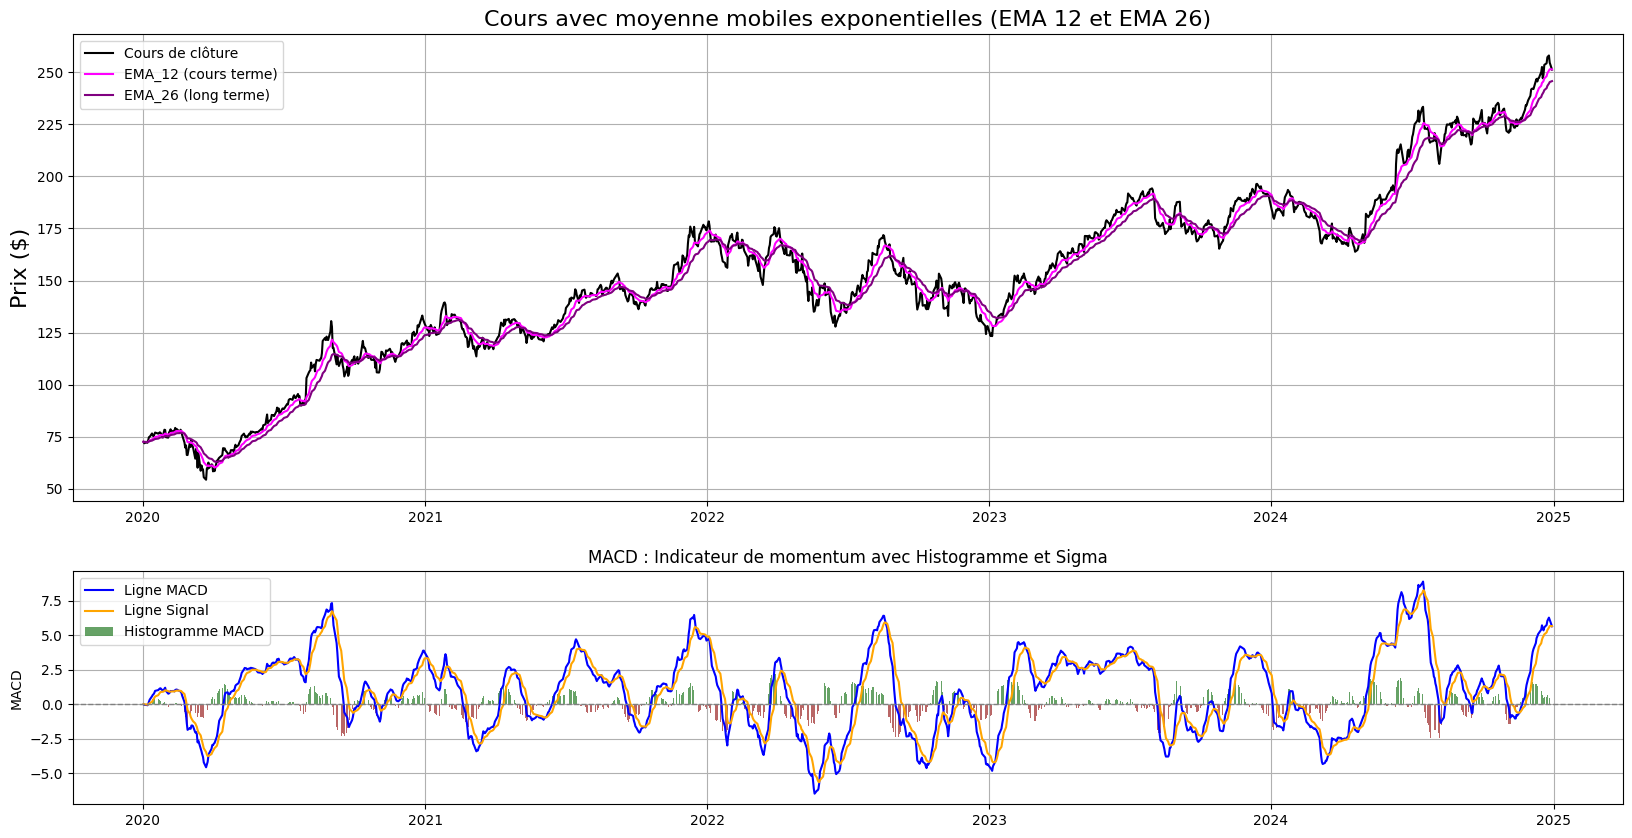

In [1253]:
fig = plt.figure(figsize=(20,10))

colors = ['darkgreen' if val >=0 else 'darkred' for val in apple["Histogram"]]

# Grille avec 2 sous-graphiques
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1], hspace=0.2)


#-------- 1. Graphique du prix + EMA ---------
ax1 = plt.subplot(gs[0])
ax1.plot(apple["Close"], label="Cours de clôture", color="black")
ax1.plot(apple["EMA_12"], label="EMA_12 (cours terme)", color="magenta")
ax1.plot(apple["EMA_26"], label = "EMA_26 (long terme)", color="purple")
ax1.set_title("Cours avec moyenne mobiles exponentielles (EMA 12 et EMA 26)", fontsize=16)
ax1.set_ylabel("Prix ($)", fontsize= 16)
ax1.legend(loc="upper left")
ax1.grid(True)

#-------- 2. Graphique MACD -------------------
ax2 = plt.subplot(gs[1], sharex=ax1)
ax2.bar(apple.index, apple["Histogram"], color=colors, alpha=0.6, label="Histogramme MACD")
ax2.plot(apple["MACD"], label="Ligne MACD", color="blue")
ax2.plot(apple["Signal"], label = "Ligne Signal", color = "orange")
ax2.axhline(0, color="gray", linewidth=1, linestyle="--")
ax2.set_title("MACD : Indicateur de momentum avec Histogramme et Sigma")
ax2.set_ylabel("MACD")
ax2.legend(loc="upper left")
ax2.grid(True)

4. **Utiliser OBV pour suivre l'accumulation**

L'**OBV (On-Balance Volume)** est un indicateur technique qui permet de mesurer la **pression d'achat et de vente** à travers les volumes. Il sert à détecter le phases d'accumulation (achats discrets) ou de distribution (ventes dissimilées) avant un mouvement de prix significatif.

Le $OBV cumule les volumes** de la manière suivante :

- Si le **cours de clôture** d'aujourd'hui est **supérieur** à celui d'hier -> on **ajoute** le volume du jour au OBV.

- Si le **cours de clôture** d'aujourd'hui est **inférieur** -> on **soustrait** le volume.

- Si le cours est **inchangé** -> le OBV reste identique

**Formule du OBV**

Soit `OBV_t` la valeur de l'OBV au jour `t`et `volume_t` le volume de ce même jour.

$$OBV_t = \begin{cases}
                OBV_{t-1} + Volume_t, \, \text{ si } Close_t > Close_{t-1}\\
                OBV_{t-1} - Volume_t, \, \text{ si } Close_t < Close_{t-1}\\
                OBV_{t-1}, \, \text{ si } Close_t = Close_{t-1}\\
           \end{cases}
$$

1. **Tendance de l'OBV**

- OBV en **hausse** -> accumulation -> les acheteurs prennent position discrètement.

- OBV en **baisse** -> distribution -> les vendeurs sortent discrèteme,y

2. **Divergence OBV/Prix**

- Si le **prix stagne ou baisse**, mais que l'OBV **monte -> signal haussier caché** (accumulation)

- Si le **prix monte**, mais que l'OBV **baisse -> signal baissier caché** (distribution).

3. **Confirmation de tendance**

- Si l'OBV suit et renforce le mouvement du prix -> la tendance est **saine**

- Si l'OBV **ne suit plus** -> prudence : possible retournement à venir.

In [1254]:
def calculate_obv(data):
    """
    Calcule l'indicateur technique OBV à partir des colonnes 'Close' et 'Volume'.capitalize

    L'OBV mesure la pression d'achat et de vente à l'aide des volumes :
    - Si le prix de clôture du jour est supérieur à celui de la veille -> on ajoute le volume du jour au OBV (au cumul).

    - Si le prix de clôture du jour est inférieur à celui de la veille -> on soustrait le volume.

    - Si le prix reste égal (inchangé) entre le jour et la veille -> le OBV reste identique

    Paramètres :
    -----------

    data : pd.DataFrame
        Un DataFrame contenant au minimum les colonnes 'Close' (cours de clôture) et 'Volume' (volume d'échange).

    Retour : 
    -------
    pd.DataFrame
        Le même DataFrame avec une colonne supplémentaire "OBV" représentant l'indicateur On-Balance Vaolume.

    Exemple : 
    --------
    >>> df = calculate_obv(df[['Close', 'Volume']] )
    >>> df[['Close', 'OBV']].plot()
    """

    obv = [0] # Initialisation avec 0
    close = data["Close"].values
    volume = data["Volume"].values
    
    for i in range(1, len(data)):
        
        if close[i] > close[i-1]:
            obv.append(obv[-1]+volume[i])

        elif close[i] < close[i-1]:
            obv.append(obv[-1]-volume[i])
        else:
            obv.append(obv[-1])
    
    data = data.copy() # Pour éviter les effets de bord
    data["OBV"] = obv
    return data

In [1255]:
apple.head()

Price,Close,High,Low,Open,Volume,diff,gain,loss,avg_gain_14,avg_loss_14,rs,RSI,EMA_12,EMA_26,MACD,Signal,Histogram
Date,,,,,,,,,,,,,,,,,
2020-01-02,72.538513,72.598892,71.292304,71.545890,135480400,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,72.538513,72.538513,0.000000,0.000000,0.000000
2020-01-03,71.833298,72.594063,71.608692,71.765674,146322800,-0.705215,0.000000,0.705215,NaN,NaN,NaN,NaN,72.430018,72.486275,-0.056257,-0.011251,-0.045005
2020-01-06,72.405655,72.444298,70.702990,70.954166,118387200,0.572357,0.572357,0.000000,NaN,NaN,NaN,NaN,72.426270,72.480303,-0.054033,-0.019808,-0.034225
2020-01-07,72.065140,72.671333,71.845362,72.415330,108872000,-0.340515,0.000000,0.340515,NaN,NaN,NaN,NaN,72.370712,72.449550,-0.078839,-0.031614,-0.047225
2020-01-08,73.224411,73.526303,71.768086,71.768086,132079200,1.159271,1.159271,0.000000,NaN,NaN,NaN,NaN,72.502050,72.506947,-0.004897,-0.026271,0.021373


In [1256]:
apple = calculate_obv(apple)

In [1257]:
apple.head()

Price,Close,High,Low,Open,Volume,diff,gain,loss,avg_gain_14,avg_loss_14,rs,RSI,EMA_12,EMA_26,MACD,Signal,Histogram,OBV
Date,,,,,,,,,,,,,,,,,,
2020-01-02,72.538513,72.598892,71.292304,71.545890,135480400,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,72.538513,72.538513,0.000000,0.000000,0.000000,0
2020-01-03,71.833298,72.594063,71.608692,71.765674,146322800,-0.705215,0.000000,0.705215,NaN,NaN,NaN,NaN,72.430018,72.486275,-0.056257,-0.011251,-0.045005,-146322800
2020-01-06,72.405655,72.444298,70.702990,70.954166,118387200,0.572357,0.572357,0.000000,NaN,NaN,NaN,NaN,72.426270,72.480303,-0.054033,-0.019808,-0.034225,-27935600
2020-01-07,72.065140,72.671333,71.845362,72.415330,108872000,-0.340515,0.000000,0.340515,NaN,NaN,NaN,NaN,72.370712,72.449550,-0.078839,-0.031614,-0.047225,-136807600
2020-01-08,73.224411,73.526303,71.768086,71.768086,132079200,1.159271,1.159271,0.000000,NaN,NaN,NaN,NaN,72.502050,72.506947,-0.004897,-0.026271,0.021373,-4728400


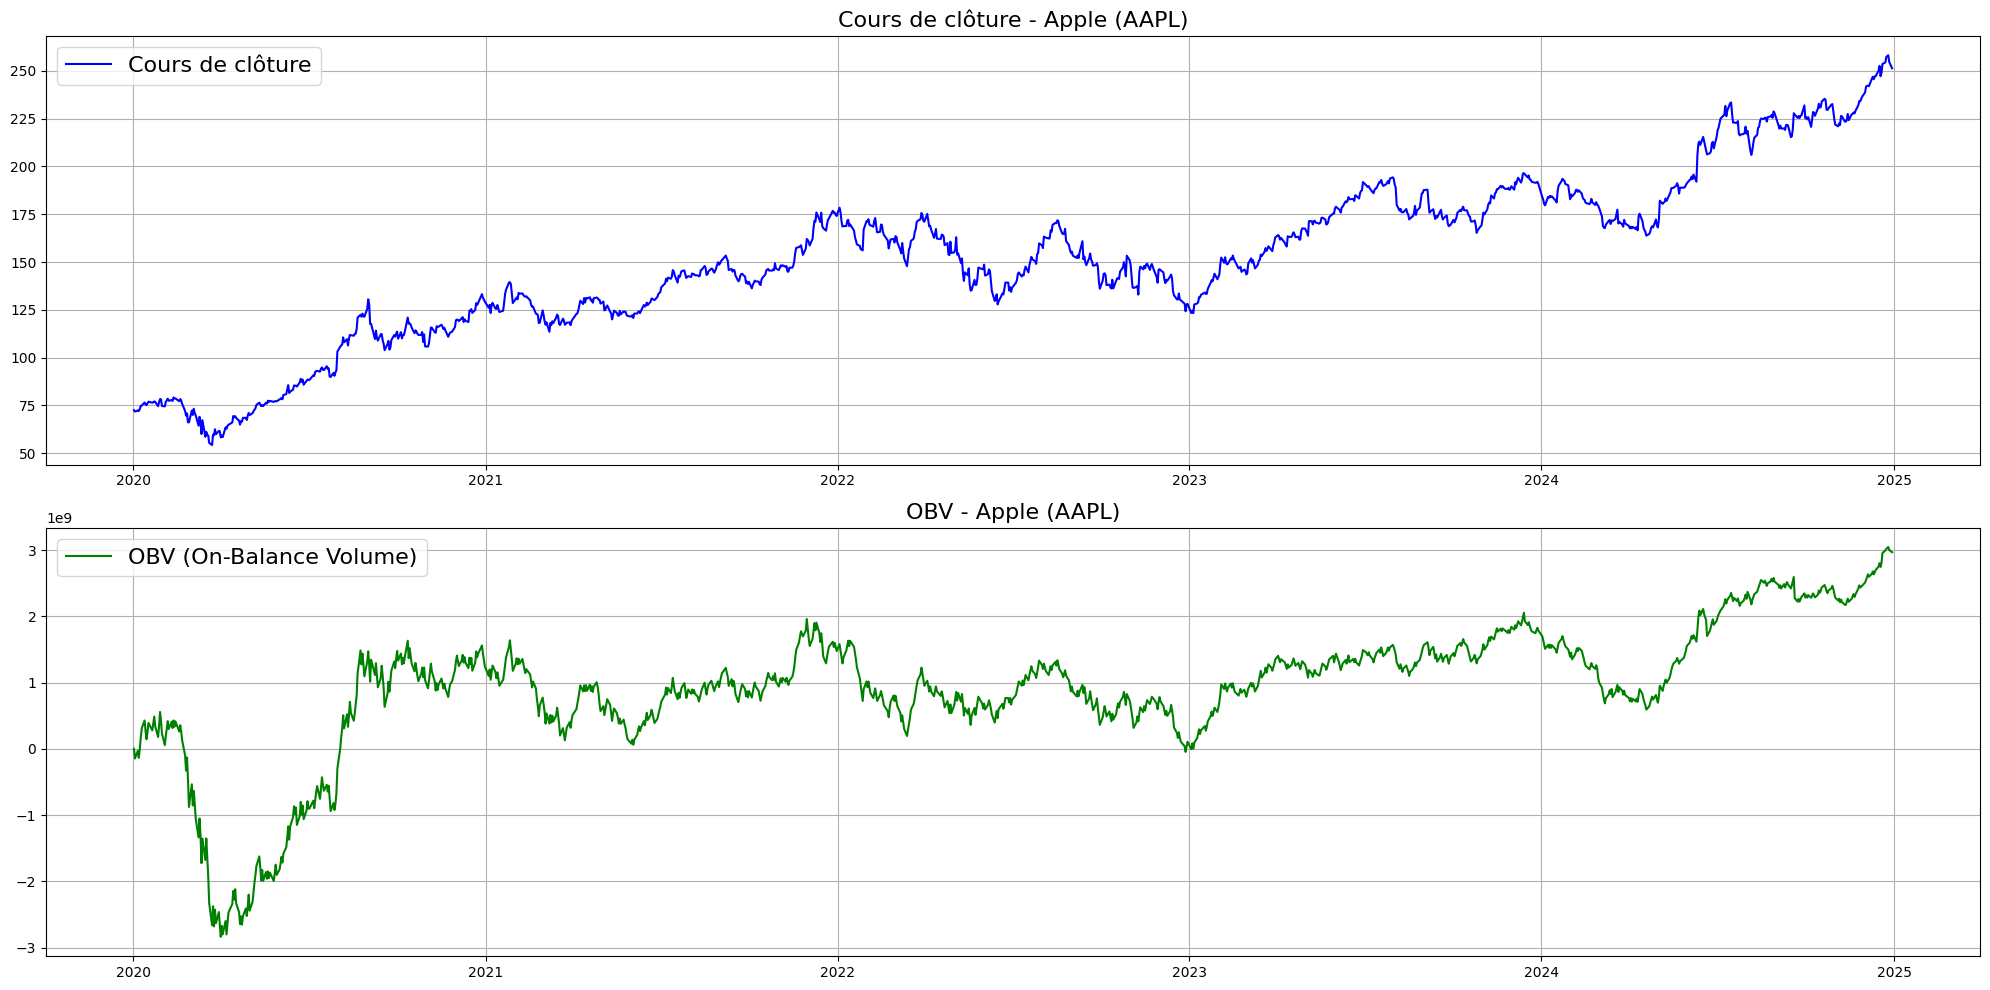

In [1258]:
# Visualisation

plt.figure(figsize=(20, 10))

# Cours de clôture
plt.subplot(2, 1, 1)
plt.plot(apple["Close"], label="Cours de clôture", color="blue")
plt.title("Cours de clôture - Apple (AAPL)", fontsize=16)
plt.legend(fontsize=16)
plt.grid()

# OBV
# Cours de clôture
plt.subplot(2, 1, 2)
plt.plot(apple["OBV"], label="OBV (On-Balance Volume)", color="green")
plt.title("OBV - Apple (AAPL)", fontsize=16)
plt.legend(fontsize=16)
plt.grid()

plt.tight_layout()

L'indicateur OBV permet de mesurer la pression d'achat et de vente à travers les volumes uniquement. Dans la prochaine partie on va parler d'indicateur d'accumulation et de distribution.

5. **Etudier les indicateurs d'accumulation/distribution (A/D Line)**

L'indicateur **Accumulation/Distributio (A/D Line)** est un outil technique qui mesure la **pression acheteuse ou vendeuse** en combinant **prix** et **volume**.

Il sert à détecter les phases d'**accumulation** (achats discrets) ou **distribution** (ventes manquées), souvent avant que le prix ne bouge significativement.

$$
CLV_t = \frac{(Close_t - Low_t) - (High_t - Close_t)}{High_t - Low_t} \text{ et } MFV_t = CLV_t\times Volume_t \text{ et } A/D_t = A/D_{t-1} + MFV_t,
$$

**Signification des termes**

- `Close_t`: **prix de clôture** du jour `t``

- `Low_t` : **plus bas** du jour `t`

- `High_t` : **plus haut** du jour `t`

- `CLV_t` : **Close Location Value**, qui indique la position relative du prix de clôture dans la fourchette quotidienne :
    
    - `CLV_t = + 1` -> clôture proche du **plus haut** -> pression acheteuse

    - `CLV_t = - 1` -> clôture proche du **plus bas** -> pression vendeuse

    - `CLV_t = 0 ` -> clôture **centrée** dans la fourchette 

- `MFV_t` : **Money Flow Volume** -> volume pondérée par le CLV

- `A/D_t` : **Accumulation/Distribution** cumulée

**Interprétation**

- **A/D Line monte** -> pression d'achat (accumulation) -> potentiel signal haussier

- **A/D Line descend** -> pression de vente (distribution) -> potentiel signal bassière

- **Divergence** entre A/D et le prix:

    - Si le prix monte mais l'A/D stagne ou baisse -> faiblesse du mouvement -> médiane

    - Si le prix baisse mais A/D monte -> accumulation cachée -> possibile retournement.


**Résumé : **





In [1259]:

df = {"Clôture": ["Près du haut", "Milieu", "Près du bas"],
      "CLV approx" : [+1, 0, -1],
      "Impact sur MFV" : ["Volume positif", 0, "Volume négatif"],
      "Impact sur A/D" : ["Hausse", "Stable", "Baisse"]
      }
df = pd.DataFrame(df)
# print(df.to_string(index=False))

df


,Clôture,CLV approx,Impact sur MFV,Impact sur A/D
0,Près du haut,1,Volume positif,Hausse
1,Milieu,0,0,Stable
2,Près du bas,-1,Volume négatif,Baisse


In [1260]:
plot_data = apple.copy() # modifier la base de dans une nouvelle table sans garder de lien avec la base précédente.
plot_data = plot_data.reset_index()

In [1261]:
plot_data.head()

Price,Date,Close,High,Low,Open,Volume,diff,gain,loss,avg_gain_14,avg_loss_14,rs,RSI,EMA_12,EMA_26,MACD,Signal,Histogram,OBV
0,2020-01-02,72.538513,72.598892,71.292304,71.545890,135480400,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,72.538513,72.538513,0.000000,0.000000,0.000000,0
1,2020-01-03,71.833298,72.594063,71.608692,71.765674,146322800,-0.705215,0.000000,0.705215,NaN,NaN,NaN,NaN,72.430018,72.486275,-0.056257,-0.011251,-0.045005,-146322800
2,2020-01-06,72.405655,72.444298,70.702990,70.954166,118387200,0.572357,0.572357,0.000000,NaN,NaN,NaN,NaN,72.426270,72.480303,-0.054033,-0.019808,-0.034225,-27935600
3,2020-01-07,72.065140,72.671333,71.845362,72.415330,108872000,-0.340515,0.000000,0.340515,NaN,NaN,NaN,NaN,72.370712,72.449550,-0.078839,-0.031614,-0.047225,-136807600
4,2020-01-08,73.224411,73.526303,71.768086,71.768086,132079200,1.159271,1.159271,0.000000,NaN,NaN,NaN,NaN,72.502050,72.506947,-0.004897,-0.026271,0.021373,-4728400


In [1262]:
clv = ((plot_data["Close"] - plot_data["Low"]) - (plot_data["High"] - plot_data["Close"]))/(plot_data["High"]- plot_data["Low"])

In [1263]:
clv

0       0.907579
1      -0.544120
2       0.955616
3      -0.467831
4       0.656593
          ...   
1252    0.654554
1253    0.993165
1254    0.125493
1255   -0.102840
1256    0.054543
Length: 1257, dtype: float64

In [1264]:
clv.isnull().mean()

np.float64(0.0)

In [1265]:
clv.fillna(0)

0       0.907579
1      -0.544120
2       0.955616
3      -0.467831
4       0.656593
          ...   
1252    0.654554
1253    0.993165
1254    0.125493
1255   -0.102840
1256    0.054543
Length: 1257, dtype: float64

In [1266]:
# Indicateur MFV

mfv = clv*plot_data["Volume"]

In [1267]:
mfv

0       1.229591e+08
1      -7.961712e+07
2       1.131327e+08
3      -5.093375e+07
4       8.672232e+07
            ...     
1252    2.674431e+07
1253    2.307589e+07
1254    3.418056e+06
1255   -4.355804e+06
1256    1.939421e+06
Length: 1257, dtype: float64

In [1268]:
mfv.isnull().mean()

np.float64(0.0)

In [1269]:
# A/D Line Indicateur (somme cumulée de mfv)
ad = mfv.cumsum()

In [1270]:
ad

0       1.229591e+08
1       4.334199e+07
2       1.564747e+08
3       1.055410e+08
4       1.922633e+08
            ...     
1252    6.051203e+09
1253    6.074279e+09
1254    6.077697e+09
1255    6.073341e+09
1256    6.075281e+09
Length: 1257, dtype: float64

In [1271]:
plot_data["CLV"] = clv
plot_data["MFV"] = mfv
plot_data["A/D Line"] = ad

In [1272]:
plot_data.head()

Price,Date,Close,High,Low,Open,Volume,diff,gain,loss,avg_gain_14,...,RSI,EMA_12,EMA_26,MACD,Signal,Histogram,OBV,CLV,MFV,A/D Line
0,2020-01-02,72.538513,72.598892,71.292304,71.545890,135480400,NaN,0.000000,0.000000,NaN,...,NaN,72.538513,72.538513,0.000000,0.000000,0.000000,0,0.907579,1.229591e+08,1.229591e+08
1,2020-01-03,71.833298,72.594063,71.608692,71.765674,146322800,-0.705215,0.000000,0.705215,NaN,...,NaN,72.430018,72.486275,-0.056257,-0.011251,-0.045005,-146322800,-0.544120,-7.961712e+07,4.334199e+07
2,2020-01-06,72.405655,72.444298,70.702990,70.954166,118387200,0.572357,0.572357,0.000000,NaN,...,NaN,72.426270,72.480303,-0.054033,-0.019808,-0.034225,-27935600,0.955616,1.131327e+08,1.564747e+08
3,2020-01-07,72.065140,72.671333,71.845362,72.415330,108872000,-0.340515,0.000000,0.340515,NaN,...,NaN,72.370712,72.449550,-0.078839,-0.031614,-0.047225,-136807600,-0.467831,-5.093375e+07,1.055410e+08
4,2020-01-08,73.224411,73.526303,71.768086,71.768086,132079200,1.159271,1.159271,0.000000,NaN,...,NaN,72.502050,72.506947,-0.004897,-0.026271,0.021373,-4728400,0.656593,8.672232e+07,1.922633e+08


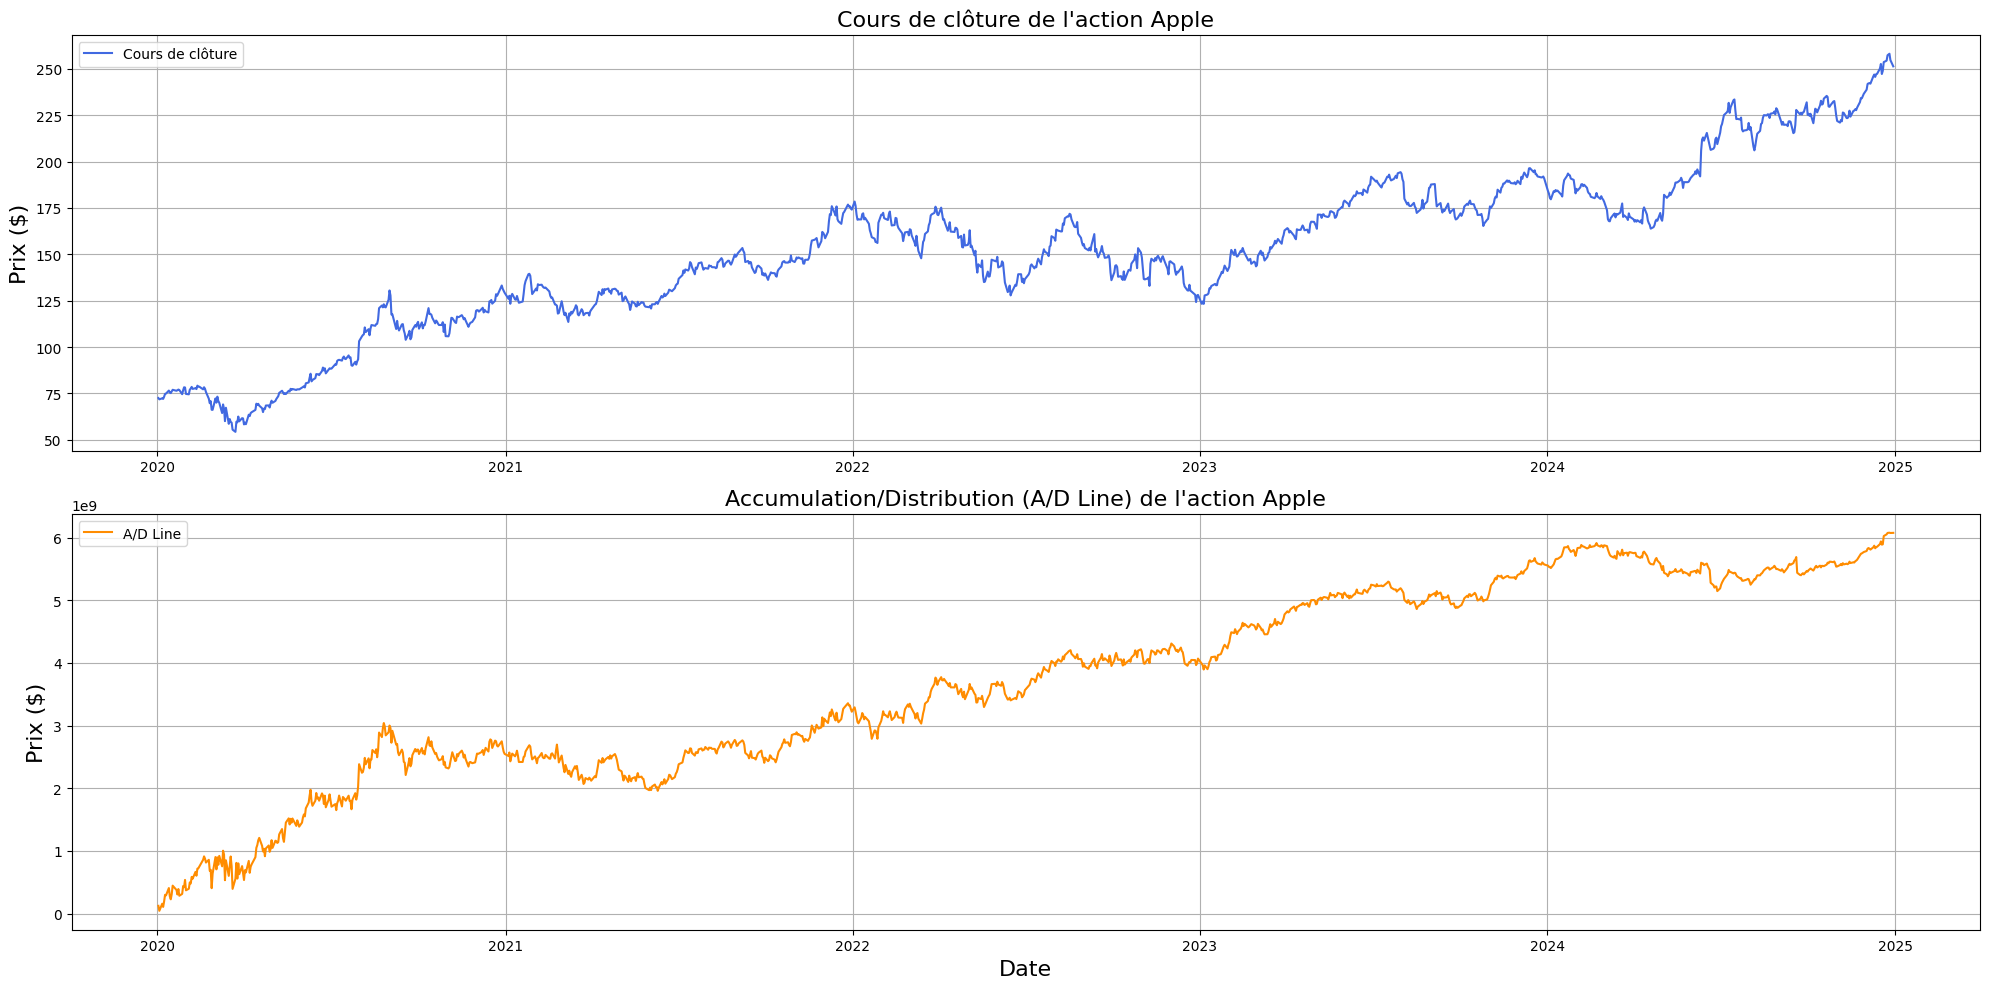

In [1273]:
# Visualisation

plt.figure(figsize=(20, 10))

# 1. Cours de clôture
plt.subplot(2, 1, 1)
plt.plot(plot_data["Date"], plot_data["Close"], label= "Cours de clôture", color="royalblue")
plt.title("Cours de clôture de l'action Apple", fontsize=16)
plt.ylabel("Prix ($)", fontsize=16)
plt.grid()
plt.legend()

# 2. Line A/D
plt.subplot(2, 1, 2)
plt.plot(plot_data["Date"], plot_data["A/D Line"], label= "A/D Line", color="darkorange")
plt.title("Accumulation/Distribution (A/D Line) de l'action Apple", fontsize=16)
plt.ylabel("Prix ($)", fontsize=16)
plt.xlabel("Date", fontsize=16)
plt.grid()
plt.legend()

plt.tight_layout()


**Défi** : Implémenter l'indicateur **CMF**

- L'indicateur **CMF (Chainkin Money Flow)** est un outil d'analyse technique qui mesure la pression acheteuse ou vendeuse sur une période donnée, en combinant le prix et le volume.

- Le **CMF** se base sur deux éléments :

    - Le CLV (Close Location Value), qui mesure où la clôture se situe dans la fourchette haute-basse

    - Le volume monétaire (MFV) = CLV*Volume.

    $$ CMF = \frac{\sum_{i=1}^n MFV_i}{\sum_{i=1}^n Volume_i}$$

Généralement, **n = 20 jours**

In [1274]:
n =20

In [1275]:
cmf = plot_data["MFV"].rolling(window=n).sum()/plot_data["Volume"].rolling(window=n).sum()

In [1276]:
cmf

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1252    0.401843
1253    0.379887
1254    0.364163
1255    0.349136
1256    0.325808
Length: 1257, dtype: float64

In [1277]:
plot_data["CMF"] = cmf

In [1278]:
plot_data.tail()

Price,Date,Close,High,Low,Open,Volume,diff,gain,loss,avg_gain_14,...,EMA_12,EMA_26,MACD,Signal,Histogram,OBV,CLV,MFV,A/D Line,CMF
1252,2024-12-23,254.367035,254.745680,252.553466,253.868804,40858800,0.777237,0.777237,0.000000,1.390066,...,248.171348,242.419953,5.751395,5.208143,0.543252,2993894800,0.654554,2.674431e+07,6.051203e+09,0.401843
1253,2024-12-24,257.286682,257.296626,254.386957,254.586262,23234700,2.919647,2.919647,0.000000,1.572988,...,249.573707,243.521192,6.052515,5.377017,0.675498,3017129500,0.993165,2.307589e+07,6.074279e+09,0.379887
1254,2024-12-26,258.103729,259.179926,256.718662,257.276679,27237100,0.817047,0.817047,0.000000,1.629215,...,250.886018,244.601380,6.284638,5.558542,0.726097,3044366600,0.125493,3.418056e+06,6.077697e+09,0.364163
1255,2024-12-27,254.685883,257.784897,252.164833,256.917949,42355300,-3.417847,0.000000,3.417847,1.629215,...,251.470613,245.348380,6.122233,5.671280,0.450953,3002011300,-0.102840,-4.355804e+06,6.073341e+09,0.349136
1256,2024-12-30,251.307861,252.603266,249.862994,251.337754,35557500,-3.378021,0.000000,3.378021,1.350916,...,251.445574,245.789823,5.655751,5.668174,-0.012423,2966453800,0.054543,1.939421e+06,6.075281e+09,0.325808


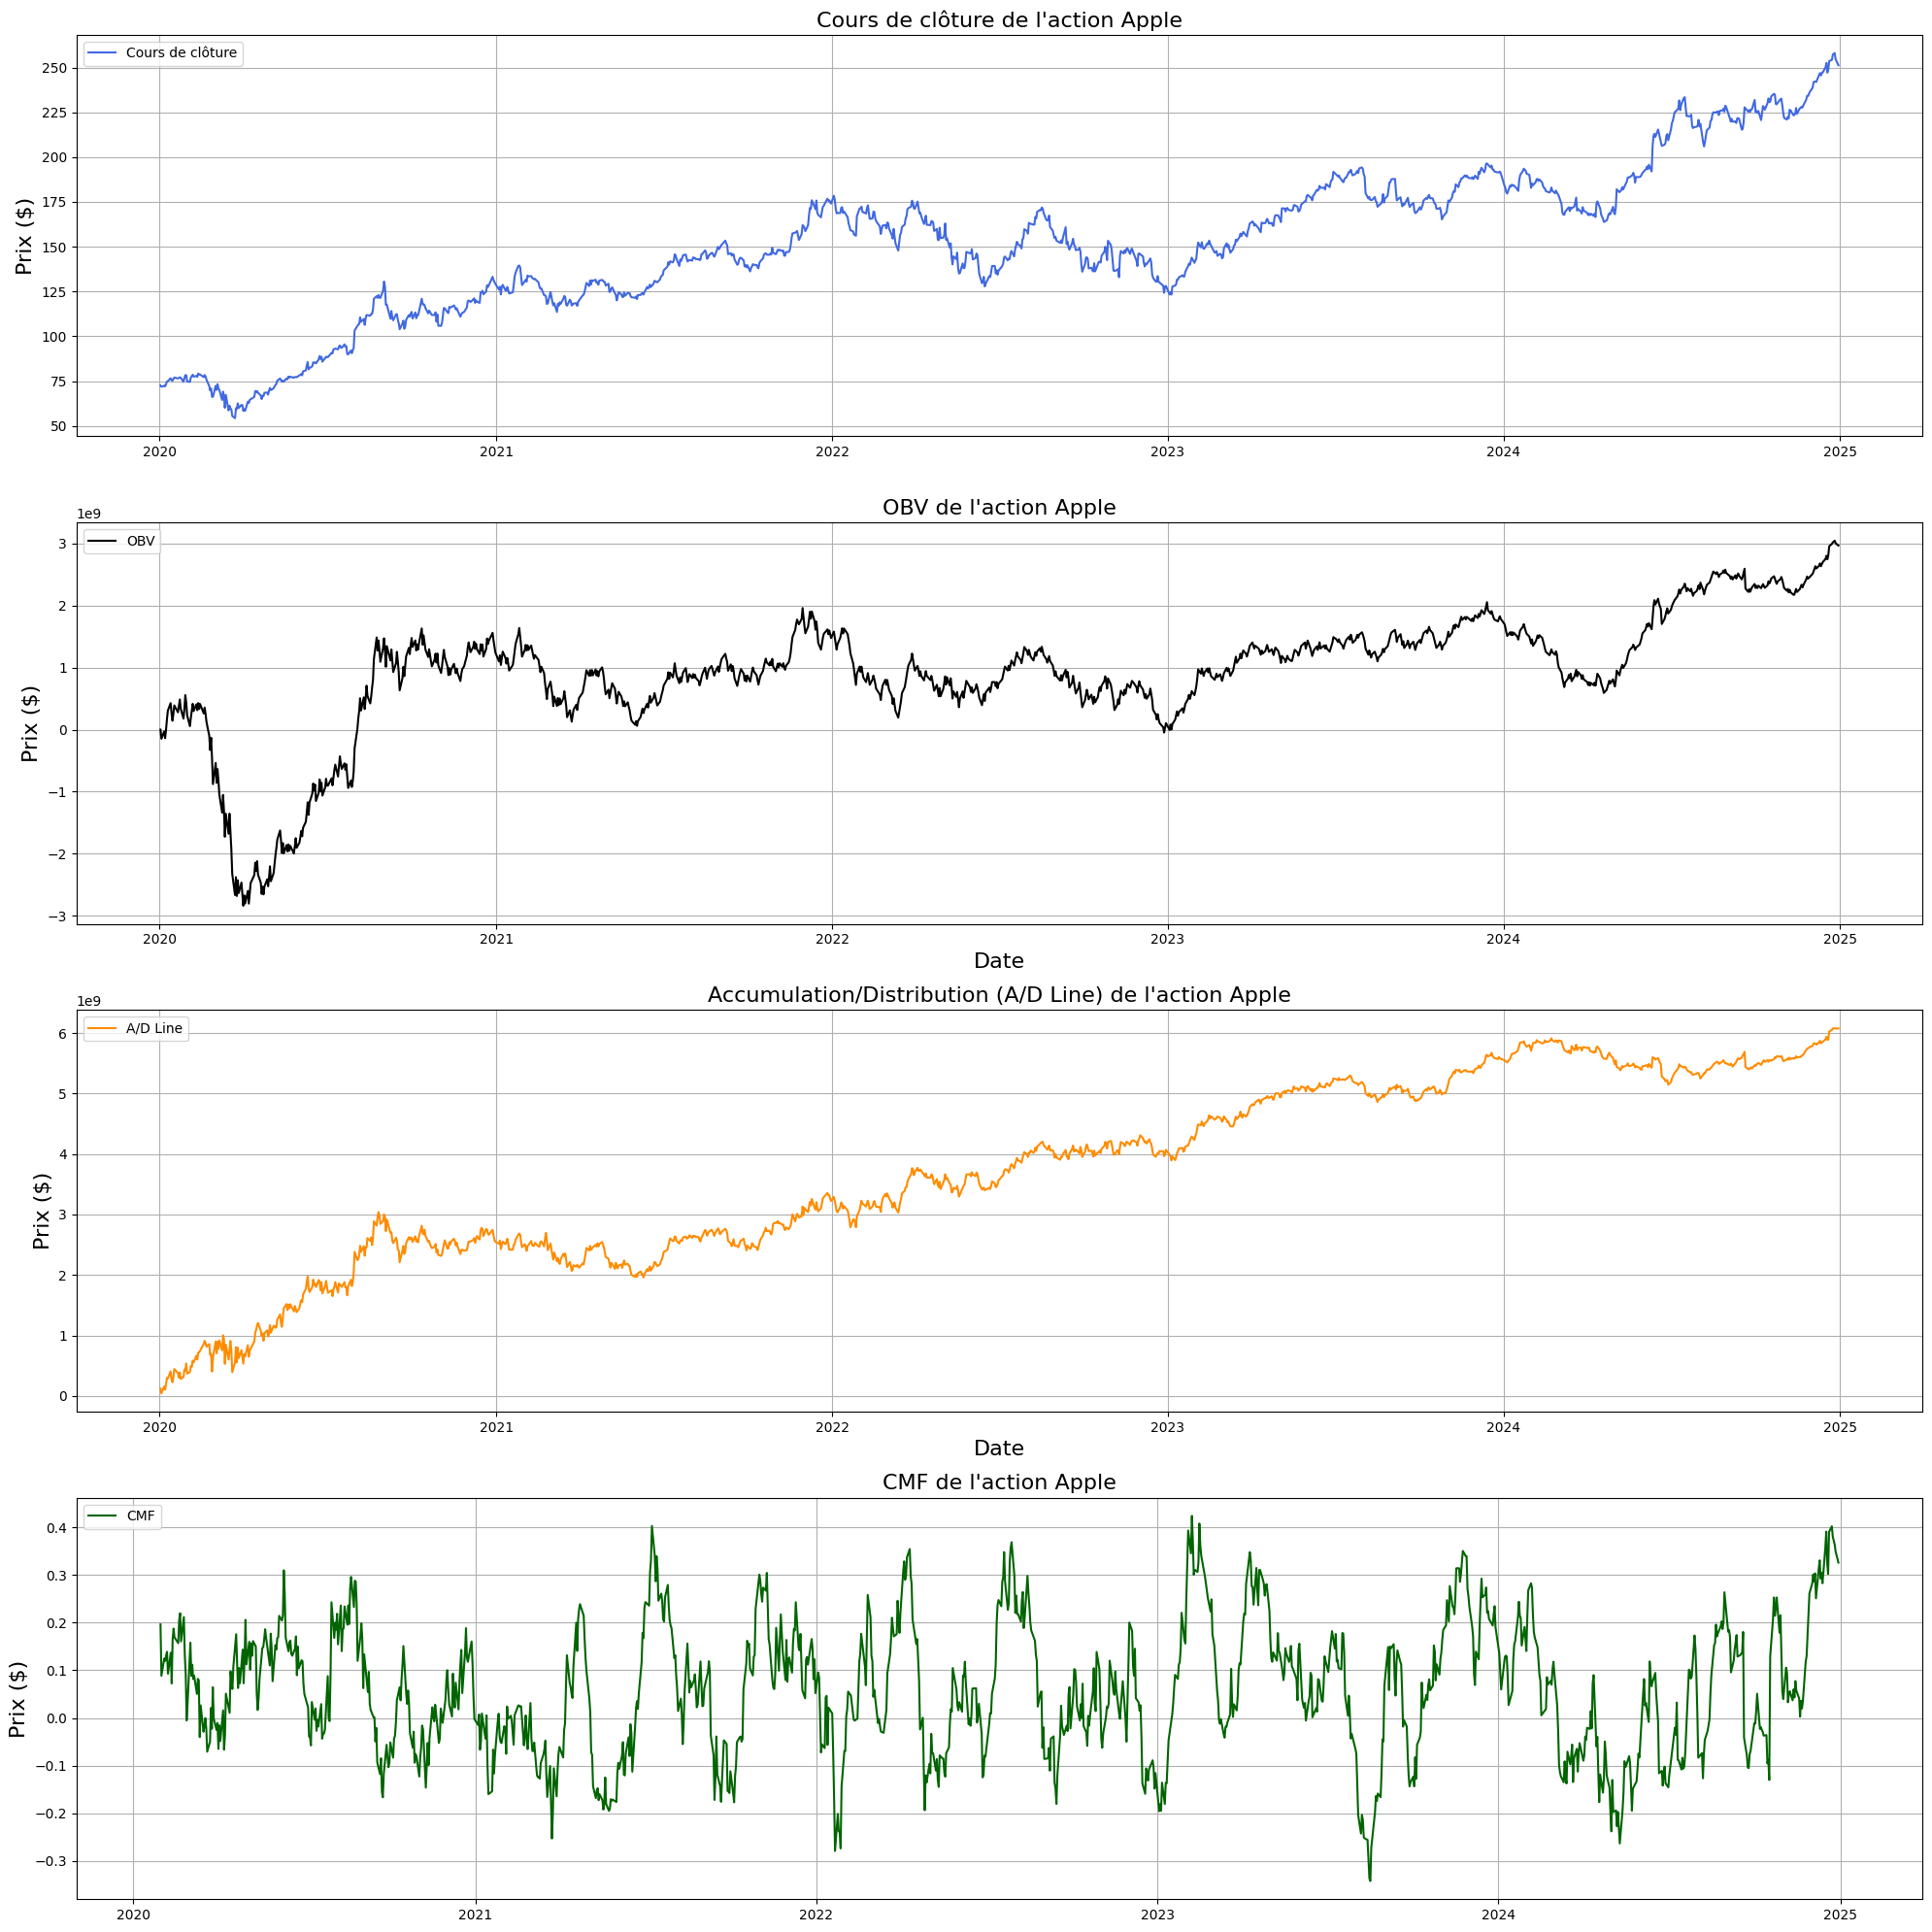

In [1279]:
# Vicualisation

plt.figure(figsize=(20, 20))

# 1. Cours de clôture
plt.subplot(4, 1, 1)
plt.plot(plot_data["Date"], plot_data["Close"], label= "Cours de clôture", color="royalblue")
plt.title("Cours de clôture de l'action Apple", fontsize=16)
plt.ylabel("Prix ($)", fontsize=16)
plt.grid()
plt.legend()

# 2. Line A/D
plt.subplot(4, 1, 2)
plt.plot(plot_data["Date"], plot_data["OBV"], label= "OBV", color="black")
plt.title("OBV de l'action Apple", fontsize=16)
plt.ylabel("Prix ($)", fontsize=16)
plt.xlabel("Date", fontsize=16)
plt.grid()
plt.legend()

# 2. Line A/D
plt.subplot(4, 1, 3)
plt.plot(plot_data["Date"], plot_data["A/D Line"], label= "A/D Line", color="darkorange")
plt.title("Accumulation/Distribution (A/D Line) de l'action Apple", fontsize=16)
plt.ylabel("Prix ($)", fontsize=16)
plt.xlabel("Date", fontsize=16)
plt.grid()
plt.legend()

# 1. CMF
plt.subplot(4, 1, 4)
plt.plot(plot_data["Date"], plot_data["CMF"], label= "CMF", color="darkgreen")
plt.title("CMF de l'action Apple", fontsize=16)
plt.ylabel("Prix ($)", fontsize=16)
plt.grid()
plt.legend(loc = "upper left")

plt.tight_layout()

# 6 Réaliser un backtesting et mesurer la performance en python

Le **backtesting** consiste à tester une stratégie d'investissement sur des **données historiques** pour évaluer sa performance passée. Cela permet de :

- Vérifier la robustesse d'une stratégie

- Ajuster les paramètres sans risque

- Comprendre la dynamique du marché

**Objectif**

- Comprendre le principe du backtesting et son intérêt en finance.

- Implémenter une stratégie de trading simple en Python (ex : croisement de moyennes mobiles)

- Simuler des transactions à l'aide de la librairie `backtrader``

- Mesurer et interpréter les performances de la stratégie (rendement, capital final, drawdown)

- Manipuler des outils Python adaptés à l'analyse financière : `pandas`, `matplotlib`, `yfinance`, `backtrader`




In [1280]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot


In [1281]:
df = yf.download("AAPL", start="2020-01-01", end = "2024-12-31")

[*********************100%***********************]  1 of 1 completed


In [1282]:
df.columns = df.columns.droplevel("Ticker")

In [1283]:
df.dropna(inplace=True)

In [1284]:
df.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,72.538513,72.598892,71.292304,71.545890,135480400
2020-01-03,71.833298,72.594063,71.608692,71.765674,146322800
2020-01-06,72.405655,72.444298,70.702990,70.954166,118387200
2020-01-07,72.065140,72.671333,71.845362,72.415330,108872000
2020-01-08,73.224411,73.526303,71.768086,71.768086,132079200


1. **Implémenter une stratégie simple**

Une stratégie de **croisement de moyennes mobiles** est l'une des méthodes les plus populaires et accessibles en trading algorithmique.

**Principe**

Cette stratégie repose sur la comparaison de deux moyennes :

- **SMA courte** (ex. 20 jours) : réagit plus vite aux variations du marché

- **SMA longue** (ex. 50 jours) : filtres les mouvements de court terme et donne une tendance plus stable

**Règles**

- **Signal d'achat** : lorsque la SMA courte **croise au-dessus** (supérieur) de la SMA longue -> début d'une tendance haussière probable

- **Signal de vente** : lorsque la SMA courte **corise en dessous** (inférieur) de la SMA longue -> début d'une tendance baissière probable

Cette stratégie permet de suivre la tendance du marché sans tenter de prédire les retournements

L'objectif est de **laisser courir les gains** et de **limiter les pertes** en réagissant uniquement aux signaux données par les            croisements

**Avantages**

- Facile à comprendre et à coder

- Adaptable à n'importe quel actif

- Fonctionne bien dans les marchés en tendance

**Limites**

- Moins performant dans les marchés en range (sans tendance)

- Peut génrer des faux signaux (bruit de marché)

In [1285]:
courte=20
longue = 50

In [1286]:
df[f"SMA_{courte}"] = df["Close"].rolling(window=courte).mean()

In [1287]:
df.tail()

Price,Close,High,Low,Open,Volume,SMA_20
Date,,,,,,
2024-12-23,254.367035,254.745680,252.553466,253.868804,40858800,244.160250
2024-12-24,257.286682,257.296626,254.386957,254.586262,23234700,245.422272
2024-12-26,258.103729,259.179926,256.718662,257.276679,27237100,246.616033
2024-12-27,254.685883,257.784897,252.164833,256.917949,42355300,247.645380
2024-12-30,251.307861,252.603266,249.862994,251.337754,35557500,248.386250


In [1288]:
df[f"SMA_{longue}"] = df["Close"].rolling(window=longue).mean()

In [1289]:
df.tail()

Price,Close,High,Low,Open,Volume,SMA_20,SMA_50
Date,,,,,,,
2024-12-23,254.367035,254.745680,252.553466,253.868804,40858800,244.160250,234.447658
2024-12-24,257.286682,257.296626,254.386957,254.586262,23234700,245.422272,234.988821
2024-12-26,258.103729,259.179926,256.718662,257.276679,27237100,246.616033,235.495562
2024-12-27,254.685883,257.784897,252.164833,256.917949,42355300,247.645380,235.975154
2024-12-30,251.307861,252.603266,249.862994,251.337754,35557500,248.386250,236.379820


In [1290]:
df["Signal"]=0

In [1291]:
# df.loc[condition, "Signal"] = a : Sélection des lignes où condition est vraie, sur la colonne "Signal" et affecte la valeur a

df.loc[df[f"SMA_{courte}"] > df[f"SMA_{longue}"], "Signal"] = 1 # Signal d'achat
df.loc[df[f"SMA_{courte}"] < df[f"SMA_{longue}"], "Signal"] = 0 # Signal de vente 


In [1292]:
df.tail()

Price,Close,High,Low,Open,Volume,SMA_20,SMA_50,Signal
Date,,,,,,,,
2024-12-23,254.367035,254.745680,252.553466,253.868804,40858800,244.160250,234.447658,1
2024-12-24,257.286682,257.296626,254.386957,254.586262,23234700,245.422272,234.988821,1
2024-12-26,258.103729,259.179926,256.718662,257.276679,27237100,246.616033,235.495562,1
2024-12-27,254.685883,257.784897,252.164833,256.917949,42355300,247.645380,235.975154,1
2024-12-30,251.307861,252.603266,249.862994,251.337754,35557500,248.386250,236.379820,1


In [1293]:
# Déterminons la position (variation du signal entre deux dates) en utilisant la méthode diff sur df["Signal"]

df["Position"] = df["Signal"].diff() # diff permet d'avoir la variation la date actuelle et la date précédente

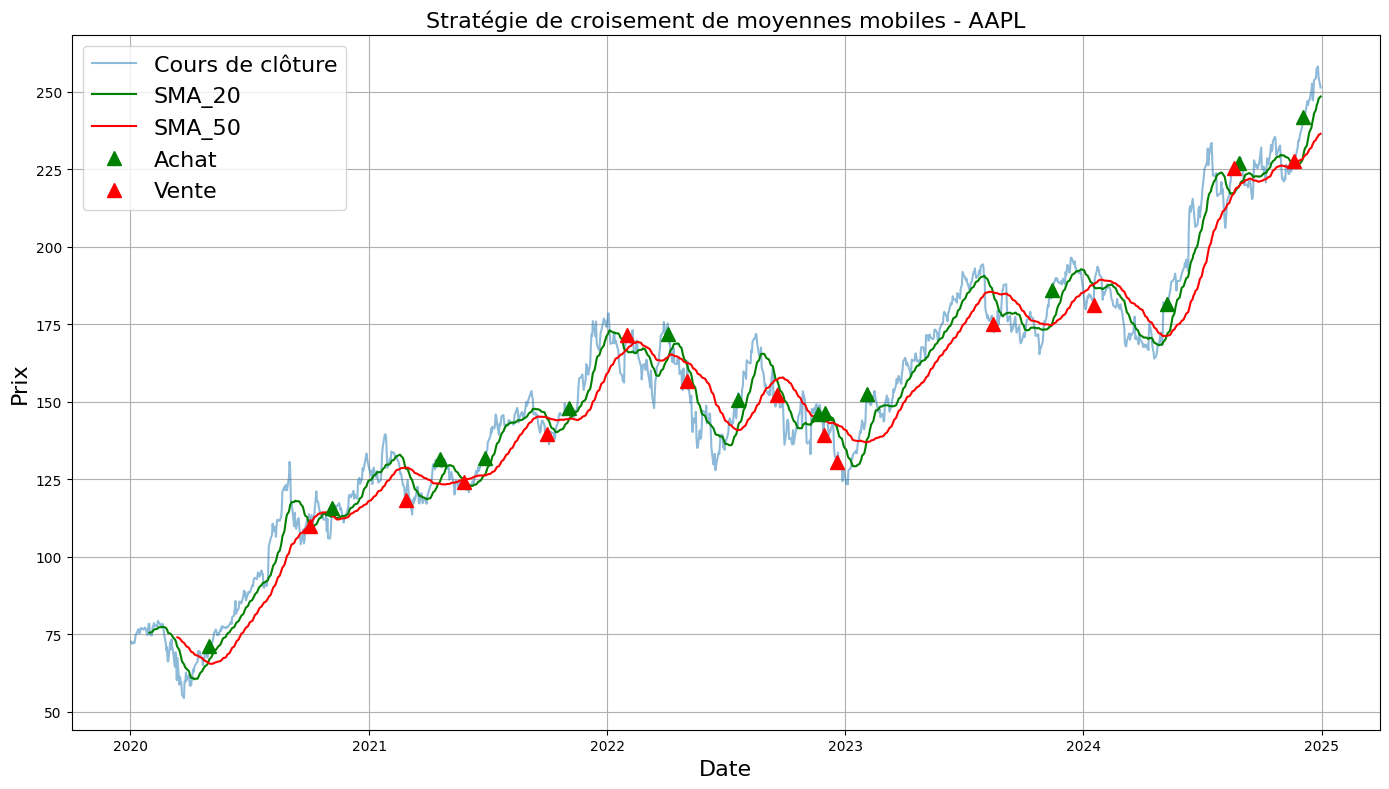

In [1294]:
plt.figure(figsize=(14,8))
plt.plot(df["Close"], label="Cours de clôture", alpha=0.5)
plt.plot(df[f"SMA_{courte}"], label=f"SMA_{courte}", color="green")
plt.plot(df[f"SMA_{longue}"], label=f"SMA_{longue}", color="red")


# Points d'achat
plt.plot(df[df["Position"]==1].index, df["Close"][df["Position"]==1], '^', color="green", markersize= 10, label = "Achat")

# Points de vente
plt.plot(df[df["Position"]==-1].index, df["Close"][df["Position"]==-1], '^', color="red", markersize= 10, label = "Vente")

plt.title("Stratégie de croisement de moyennes mobiles - AAPL", fontsize=16)
plt.xlabel("Date", fontsize=16)
plt.ylabel("Prix", fontsize = 16)
plt.legend(fontsize=16)
plt.grid()
plt.tight_layout()

2. **Simuler les transactions avec Backtrader**

**Backtrader** est une des bibliothèques Python les plus puissantes pour :

- Créer des **stratégies personnalisées**

- Simuler **les ordres (buy/sell)**

- Gérer **le portefeiulle virtuel**

- Obtenir des **statistiques détaillées** (rendement, drawdown, winrate, etc...)

**Comment fonctionne une simulation Backtrader ?**

1. Charger les données (`yfinance`, CSV ou API)

2. Définir la **stratégie** (ex : croisement de moyennes mobiles)

3. Initialiser le **portefeiulle virtuel** avec un capital de départ

4. Lancer le **backtest**

5. Observer les résultats :

- Rendement net

- Pertes maximales (drawdown)

- Ratio de trades gagnants

- Nombre de transactions

**Interprétation des résultats**

- **Courbe de capital (equity curve)** : doit être croissante et régulière

- **Signal d'achat vs performance réelle** : valide ou invalide la stratégie

- **Drawdown** : mesure la **perte maximale** en cas de mauvaise passe (à surveiller)

- **Sharpe ratio** : compare rendement /risque -> plus il est haut, mieux c'est

**Attention aux illusions de performance**

Même si une stratégie fonctionne bien sur le passé, cela ne garantit **pas sa performance future**

- Les données peuvent être **sur-optimisées** (overfitting)

- Le marché peut **changer de régime**

- Des **frais de transaction** ou des latences peuvent modifier les résultats




In [1295]:
# !pip install backtrader

In [1296]:
import backtrader as bt

In [1297]:
df

Price,Close,High,Low,Open,Volume,SMA_20,SMA_50,Signal,Position
Date,,,,,,,,,
2020-01-02,72.538513,72.598892,71.292304,71.545890,135480400,NaN,NaN,0,NaN
2020-01-03,71.833298,72.594063,71.608692,71.765674,146322800,NaN,NaN,0,0.0
2020-01-06,72.405655,72.444298,70.702990,70.954166,118387200,NaN,NaN,0,0.0
2020-01-07,72.065140,72.671333,71.845362,72.415330,108872000,NaN,NaN,0,0.0
2020-01-08,73.224411,73.526303,71.768086,71.768086,132079200,NaN,NaN,0,0.0
...,...,...,...,...,...,...,...,...,...
2024-12-23,254.367035,254.745680,252.553466,253.868804,40858800,244.160250,234.447658,1,0.0
2024-12-24,257.286682,257.296626,254.386957,254.586262,23234700,245.422272,234.988821,1,0.0
2024-12-26,258.103729,259.179926,256.718662,257.276679,27237100,246.616033,235.495562,1,0.0


In [1298]:
data = df[["Open", "High", "Low", "Close", "Volume"]].copy()

In [1299]:
data.dropna(inplace=True)

In [1300]:
# Backtrader préfère les noms de colonnes en minuscules
data.columns = [col.lower() for col in data.columns]

In [1301]:
data

,open,high,low,close,volume
Date,,,,,
2020-01-02,71.545890,72.598892,71.292304,72.538513,135480400
2020-01-03,71.765674,72.594063,71.608692,71.833298,146322800
2020-01-06,70.954166,72.444298,70.702990,72.405655,118387200
2020-01-07,72.415330,72.671333,71.845362,72.065140,108872000
2020-01-08,71.768086,73.526303,71.768086,73.224411,132079200
...,...,...,...,...,...
2024-12-23,253.868804,254.745680,252.553466,254.367035,40858800
2024-12-24,254.586262,257.296626,254.386957,257.286682,23234700
2024-12-26,257.276679,259.179926,256.718662,258.103729,27237100


In [1302]:
# On peut reset l'index 'Date' sous forme de colonne pour Backtrader
data.reset_index(inplace=True)

## Attention

J'ai remarqué qu'il faut que Date soit de type DataTime si non ça ne marche pas. Ainsi en faisant reset_index pour que Date devient une variable à part entière ne fonctionne pas. Mais j'ai remarqué qu'en utilisant le data comme tel sans fait un reset_index marche... ??? (à revoir)

In [1303]:
data

,Date,open,high,low,close,volume
0,2020-01-02,71.545890,72.598892,71.292304,72.538513,135480400
1,2020-01-03,71.765674,72.594063,71.608692,71.833298,146322800
2,2020-01-06,70.954166,72.444298,70.702990,72.405655,118387200
3,2020-01-07,72.415330,72.671333,71.845362,72.065140,108872000
4,2020-01-08,71.768086,73.526303,71.768086,73.224411,132079200
...,...,...,...,...,...,...
1252,2024-12-23,253.868804,254.745680,252.553466,254.367035,40858800
1253,2024-12-24,254.586262,257.296626,254.386957,257.286682,23234700
1254,2024-12-26,257.276679,259.179926,256.718662,258.103729,27237100
1255,2024-12-27,256.917949,257.784897,252.164833,254.685883,42355300


In [1304]:
data["Date"] = pd.to_datetime(data["Date"])
data.set_index("Date", inplace=True)
data

,open,high,low,close,volume
Date,,,,,
2020-01-02,71.545890,72.598892,71.292304,72.538513,135480400
2020-01-03,71.765674,72.594063,71.608692,71.833298,146322800
2020-01-06,70.954166,72.444298,70.702990,72.405655,118387200
2020-01-07,72.415330,72.671333,71.845362,72.065140,108872000
2020-01-08,71.768086,73.526303,71.768086,73.224411,132079200
...,...,...,...,...,...
2024-12-23,253.868804,254.745680,252.553466,254.367035,40858800
2024-12-24,254.586262,257.296626,254.386957,257.286682,23234700
2024-12-26,257.276679,259.179926,256.718662,258.103729,27237100


**Data Feed** : c'est un connecteur entre vos données pandas et Backtrader. Il lui explique comment lire la colonne "Date", "Open", etc, depuis le DataFrame.

In [1305]:
class PandasData(bt.feeds.PandasData):
    params = (
        ('datatime', 'Date'), # Indique la colonne utilisée comme date
        ('open', 'open'),
        ('high', 'high'),
        ('low', 'low'),
        ('close', 'close'),
        ('volume', 'volume'),
        ('openinterest', -1), # Pas utilisé ici, on le désactive avec -1
    )

In [1306]:
# Définition de la stratégie
class SMACrossStrategy(bt.Strategy):

    params = (
        ('sma_short', 20), # période pour la moyenne mobile courte
        ('sma_long', 50), # période pour la moyenne mobile longue
    )

    def __init__(self):
        # Calcul des deux moyennes mobiles
        self.sma_short = bt.ind.SMA(period=self.params.sma_short)
        self.sma_long = bt.ind.SMA(period=self.params.sma_long)

        # Détecter les croisements entre les deux SMA (cross up ou down)
        self.crossover = bt.ind.CrossOver(self.sma_short, self.sma_long)

    def next(self):
        # Cette méthode s'exécute à chaque nouvelle bougie (jour)
        if not self.position:
            # Si on n'a pas de position (ni achat, ni vente)
            if self.crossover > 0:
                self.buy() # Croisement haussier -> on achète
            elif self.crossover < 0 :
                self.sell() # Croisement baissier -> on revend tout 

In [1307]:
# Initialisation du moteur et définition du capital de départ
cerebro = bt.Cerebro()  # Le moteur de backtest de Backtrader
cerebro.addstrategy(SMACrossStrategy) # Ajout de notre stratégies dans le moteur

# Création du "data feed" à partir du DataFrame qu'on a récupérer
data_feed = PandasData(dataname = data)

# Ajout des données au moteur de simulation
cerebro.adddata(data_feed)

# Définir le capital initial
cerebro.broker.set_cash(10000.0)

# Affichage du capital avant simulation
print(f"Le capital initial : {cerebro.broker.getvalue() : 2f} $")

Le capital initial :  10000.000000 $


In [1308]:
# Exécution de la simulation
cerebro.run()

In [1309]:
# Affichage du capital après simulation
print(f" Capital final : {cerebro.broker.getvalue() : 2f} $")

 Capital final :  10182.010627 $


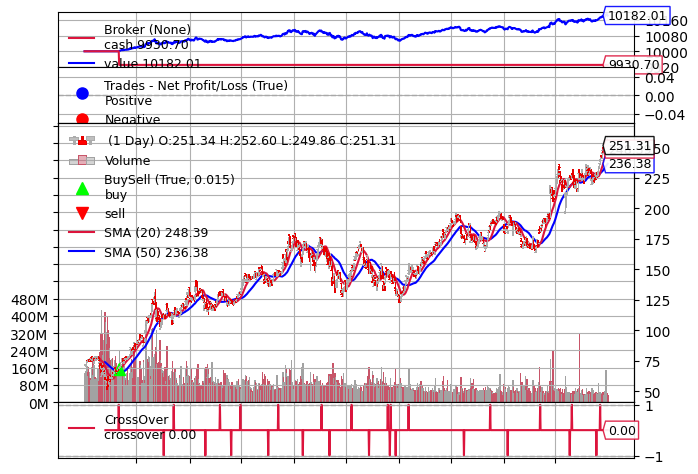

Graphique sauvegardé sous graphe.png


In [1310]:
# Visualisation

# ---------------------------
# Afficher le graphique des transactions
# - le cours
# - les deux SMA
# - les trades (achats/ventes)
# - Affichage propre

figs = cerebro.plot(iplot=False, style='candlestick', volume=True)
fig = figs[0][0]  # récupérer la figure matplotlib
fig.savefig('graphe.png')
print("Graphique sauvegardé sous graphe.png")


Après la mise en place de la stratégie, la prochaine étape consiste et mesurer la performance de la stratégie.

**Mesurer la performance de la stratégie**

Aprés avoir simulé une stratégie de trading (comme le croisement de moyennes mobiles), il est essentiel d'évaluer sa performance. Voici trois indicateurs fondamentaux à analyser : 

1. **Capital final**

Il s'agit de la valeur du portefeiulle à la fin du backtest, en tenant compte :

- du cash restant,

- et de la valeur des positions en cours.

Cela permet de savoir si la stratégie a généré un gain ou une perte.

2. **Rendement total (%)**

C'est la variation du capital exprimée en pourcentage par rapport au capital initial.

Formule : 

    Rendement (%) = [(Capital final - Capital initial)/Capital initial]*100

Un rendement positif indique une stratégie gagnante. Un rendement négatif signifie une perte nette.

3. **Drawdown maximal**

Le drawdown maximal mesure la plus forte baisse du portefeiulle depuis un sommet. C'est un indicateur de risque.

Formule :

    Drawndown = (Sommet du capital - creux suivant)/Sommet du capital

Une stratégie peut être rentable, mais risquée si le **Drawdown** est élevé.

**Autres indicateurs possibles**

- Taux de réussite des trades

- Nombre de trades gagnants/perdants

- Ratio gain/perte

- Durée moyenne des positions

- Sharpe Ratio (rendement ajusté au risque)

**Conclusion**

Une bonne stratégie ne doit pas seulement être rentable, mais aussi stable et maîtrisée en termes de risque.

In [1311]:
# Calcul du rendement

# Récupérer le capital initial et final
capital_initial = 10000 # La valeur utilisée dans set_cash
capital_final = cerebro.broker.getvalue()

# Calcul du rendement
rendement = ((capital_final - capital_initial)/capital_initial)*100

print(f"Capital initial : {capital_initial : .2f} $")
print(f"Capital final   : {capital_final : .2f} $")
print(f"Rendement total : {rendement : .2f} %")

Capital initial :  10000.00 $
Capital final   :  10182.01 $
Rendement total :  1.82 %


Si on souhaite avoir d'autre indicateurs comme **Drawdown maximal**, il faut qu'à chaque trade on conserve les informations. Dans la stratégie du haut, on avait pas stocké toutes les informations raison pour laquelle on va l'ajuster pour avoir quelque chose qui stock les informations et permet d'avoir l'ensemble des éléments. 

In [1312]:
class PandasData(bt.feeds.PandasData):
    "Permet d'avoir le data_feed"

    params = (
        ('datatime', 'Date'), # Indique la colonne utilisée comme date
        ('open', 'open'),
        ('high', 'high'),
        ('low', 'low'),
        ('close', 'close'),
        ('volume', 'volume'),
        ('openinterest', -1), # Pas utilisé ici, on le désactive avec -1
    )

# Définition de la stratégie
class SMACross(bt.Strategy):
    

    params = (
        ('sma_short', 20), # période pour la moyenne mobile courte
        ('sma_long', 50), # période pour la moyenne mobile longue
    )

    def __init__(self):
        self.capital_initial = self.broker.getvalue()
        self.sma1 = bt.ind.SMA(period=20)
        self.sma2 = bt.ind.SMA(period=50)
        self.cross = bt.ind.CrossOver(self.sma1, self.sma2)
        self.portfolio_values = []
        self.trades = []


        # # Calcul des deux moyennes mobiles
        # self.sma_short = bt.ind.SMA(period=self.params.sma_short)
        # self.sma_long = bt.ind.SMA(period=self.params.sma_long)

        # # Détecter les croisements entre les deux SMA (cross up ou down)
        # self.crossover = bt.ind.CrossOver(self.sma_short, self.sma_long)

    def next(self):
        self.portfolio_values.append(self.broker.getvalue())

        # Cette méthode s'exécute à chaque nouvelle bougie (jour)
        if not self.position:
            # Si on n'a pas de position (ni achat, ni vente)
            if self.cross > 0:
                self.buy_price = self.data.close[0]
                self.buy() # Croisement haussier -> on achète
        elif self.cross < 0 :
            if self.position:
                sell_price = self.data.close[0]
                gain = sell_price - self.buy_price
                self.trades.append(gain)
                self.sell() # Croisement baissier -> on revend tout 
    
    def stop(self):
        # Capital
        # capital_initial = cerebro.startingcash ####### Il paraît que la méthode startingcash n'existe pas 
        capital_initial = self.capital_initial
        capital_final = self.broker.getvalue()
        rendement = ((capital_final - capital_initial)/capital_initial)*100

        # Drawndown sur les trades
        peak = self.portfolio_values[0]
        max_dd = 0

        for val in self.portfolio_values:
            if val > peak:
                peak = val
            dd = (peak - val)/peak

            if dd > max_dd:
                max_dd = dd
        
        # Statistiques sur les trades
        total_trades = len(self.trades)
        wining_trades = len([t for t in self.trades if t>0])
        losing_trades = total_trades - wining_trades
        win_rate = (wining_trades/total_trades)*100 if total_trades>0 else 0
        avg_gain = sum(self.trades)/total_trades if total_trades>0 else 0
        gains = [t for t in self.trades if t>0]
        losses = [t for t in self.trades if t<0]
        avg_win = sum(gains)/len(gains) if gains else 0
        avg_loss = abs(sum(losses)/len(losses)) if losses else 0
        gain_loss_ratio = avg_win/ avg_loss if avg_loss >0 else 0

        #  Affichage des résultats
        print("---- Résultats de la stratégie  ------")
        print(f"Capital initial     : {capital_initial: .2f} $")
        print(f"capital final       : {capital_final:.2f} $")
        print(f"Rendement total     : {rendement:.2f} %")
        print(f"Drawndown maximal   : {max_dd*100 : .2f} %")
        print(f"Nombre de trades    : {total_trades} ")
        print(f"Trades gagnants     : {wining_trades}")
        print(f"Trades perdants     : {losing_trades}")
        print(f"Taux de réussite    : {win_rate :.2f} %")
        print(f"Gain moyen/trade  : {avg_gain:.2f} $")
        print(f"Ratio gain/perte    : {gain_loss_ratio:.2f} %")

In [1313]:
# Bakctest
cerebro = bt.Cerebro()
cerebro.addstrategy(SMACross)
cerebro.adddata(PandasData(dataname= data))
cerebro.broker.setcash(10000.0)
cerebro.staringcash = 10000.0

cerebro.run()

---- Résultats de la stratégie  ------
Capital initial     :  10000.00 $
capital final       : 10110.30 $
Rendement total     : 1.10 %
Drawndown maximal   :  0.49 %
Nombre de trades    : 13 
Trades gagnants     : 8
Trades perdants     : 5
Taux de réussite    : 61.54 %
Gain moyen/trade  : 7.03 $
Ratio gain/perte    : 1.77 %


**Défi** : Réaliser le Backtesting en Python

- Créer une stratégie de backtesting basée sur un croisement de moyennes mobiles simple :
    - Utiliser une SMA courte de 10 jours
    - Utilisez une SMA longue de 30 jours 
    - Acheter lorsque la SMA(10) croise au dessus de la SMA(30) (i.e. SMA(10) > SMA(30))
    - Vendre lorsque la SMA(10) croise en dessous de la SMA(30) (i.e. SMA(10) < SMA(30))



**Backtest : Implémenter une stratégie SMA(10)/SMA(30)**

In [ ]:
class PandasData(bt.feeds.PandasData):
    "Permet d'avoir le data_feed"

    params = (
        ('datatime', 'Date'), # Indique la colonne utilisée comme date
        ('open', 'open'),
        ('high', 'high'),
        ('low', 'low'),
        ('close', 'close'),
        ('volume', 'volume'),
        ('openinterest', -1), # Pas utilisé ici, on le désactive avec -1
    )

# Définition de la stratégie
class SMACross(bt.Strategy):
    
    params = (
        ('sma_short', 20), # période pour la moyenne mobile courte
        ('sma_long', 50), # période pour la moyenne mobile longue
    )

    def __init__(self, parm_sma_courte, param_sma_longue):
    
        self.capital_initial = self.broker.getvalue()
        self.sma1 = bt.ind.SMA(period=parm_sma_courte)
        self.sma2 = bt.ind.SMA(period=param_sma_longue)
        self.cross = bt.ind.CrossOver(self.sma1, self.sma2)
        self.portfolio_values = []
        self.trades = []


        # # Calcul des deux moyennes mobiles
        # self.sma_short = bt.ind.SMA(period=self.params.sma_short)
        # self.sma_long = bt.ind.SMA(period=self.params.sma_long)

        # # Détecter les croisements entre les deux SMA (cross up ou down)
        # self.crossover = bt.ind.CrossOver(self.sma_short, self.sma_long)

    def next(self):
        self.portfolio_values.append(self.broker.getvalue())

        # Cette méthode s'exécute à chaque nouvelle bougie (jour)
        if not self.position:
            # Si on n'a pas de position (ni achat, ni vente)
            if self.cross > 0:
                self.buy_price = self.data.close[0]
                self.buy() # Croisement haussier -> on achète
        elif self.cross < 0 :
            if self.position:
                sell_price = self.data.close[0]
                gain = sell_price - self.buy_price
                self.trades.append(gain)
                self.sell() # Croisement baissier -> on revend tout 
    
    def stop(self):
        # Capital
        # capital_initial = cerebro.startingcash ####### Il paraît que la méthode startingcash n'existe pas 
        capital_initial = self.capital_initial
        capital_final = self.broker.getvalue()
        rendement = ((capital_final - capital_initial)/capital_initial)*100

        # Drawndown sur les trades
        peak = self.portfolio_values[0]
        max_dd = 0

        for val in self.portfolio_values:
            if val > peak:
                peak = val
            dd = (peak - val)/peak

            if dd > max_dd:
                max_dd = dd
        
        # Statistiques sur les trades
        total_trades = len(self.trades)
        wining_trades = len([t for t in self.trades if t>0])
        losing_trades = total_trades - wining_trades
        win_rate = (wining_trades/total_trades)*100 if total_trades>0 else 0
        avg_gain = sum(self.trades)/total_trades if total_trades>0 else 0
        gains = [t for t in self.trades if t>0]
        losses = [t for t in self.trades if t<0]
        avg_win = sum(gains)/len(gains) if gains else 0
        avg_loss = abs(sum(losses)/len(losses)) if losses else 0
        gain_loss_ratio = avg_win/ avg_loss if avg_loss >0 else 0

        #  Affichage des résultats
        print("---- Résultats de la stratégie  ------")
        print(f"Capital initial     : {capital_initial: .2f} $")
        print(f"capital final       : {capital_final:.2f} $")
        print(f"Rendement total     : {rendement:.2f} %")
        print(f"Drawndown maximal   : {max_dd*100 : .2f} %")
        print(f"Nombre de trades    : {total_trades} ")
        print(f"Trades gagnants     : {wining_trades}")
        print(f"Trades perdants     : {losing_trades}")
        print(f"Taux de réussite    : {win_rate :.2f} %")
        print(f"Gain moyen/trade  : {avg_gain:.2f} $")
        print(f"Ratio gain/perte    : {gain_loss_ratio:.2f} %")

In [1315]:
# Paramètres SMA
parm_sma_courte = 10
param_sma_longue = 30

# Bakctest
cerebro = bt.Cerebro()
cerebro.addstrategy(SMACross, parm_sma_courte, param_sma_longue)
cerebro.adddata(PandasData(dataname= data))
cerebro.broker.setcash(10000.0)
cerebro.staringcash = 10000.0

cerebro.run()

---- Résultats de la stratégie  ------
Capital initial     :  10000.00 $
capital final       : 10102.71 $
Rendement total     : 1.03 %
Drawndown maximal   :  0.45 %
Nombre de trades    : 20 
Trades gagnants     : 9
Trades perdants     : 11
Taux de réussite    : 45.00 %
Gain moyen/trade  : 3.93 $
Ratio gain/perte    : 2.31 %


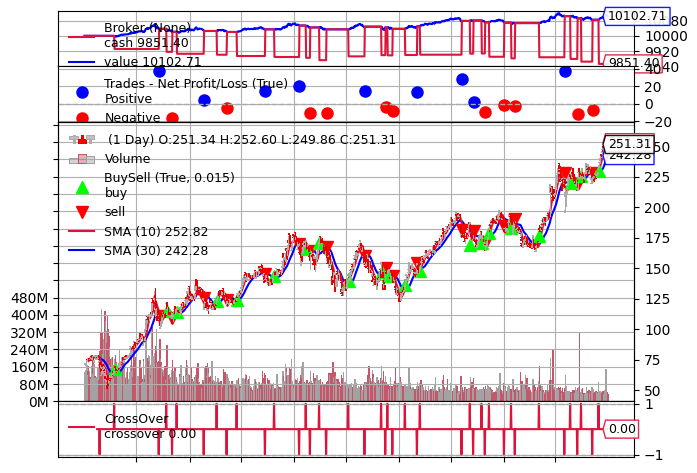

Graphique sauvegardé sous graphe.png


In [1316]:
figs = cerebro.plot(iplot=False, style='candlestick', volume=True)
fig = figs[0][0]  # récupérer la figure matplotlib
fig.savefig('Backtest_SMA(10)_SMA(30).png')
print("Graphique sauvegardé sous graphe.png")

Cette stratégie est plus faible que dans le cas SMA(20)/SMA(50). 

# 7. Appliquer le Machine Learning à la finance

1. **Comprendre l'application du Machina Learning en finance**

Découvrir comment le Machine Learning est utilisé dans la finance : prédiction de prix, classification des tendances et optimisation des stratégies d'investissement.

2. **Préparation des données pour un modèle ML**

**Note**: Grabage in garbage out. Si vous mettez en éntrée des données qui sont de mauvaise qualité (garbage in) en sortie, vous aurez un modèle qui produit des mauvais résultats (garbage out). La qualité des données est la clée pour avoir un modèle de ML efficace.

In [1317]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


In [1318]:
data = yf.download("AAPL", start="2020-01-01", end="2024-12-31")

[*********************100%***********************]  1 of 1 completed


In [1319]:
data.columns = data.columns.droplevel("Ticker")

In [1320]:
data.dropna(inplace=True)

In [1321]:
data.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,72.538513,72.598892,71.292304,71.545890,135480400
2020-01-03,71.833298,72.594063,71.608692,71.765674,146322800
2020-01-06,72.405655,72.444298,70.702990,70.954166,118387200
2020-01-07,72.065140,72.671333,71.845362,72.415330,108872000
2020-01-08,73.224411,73.526303,71.768086,71.768086,132079200


In [1322]:
# Détecter le valeurs abérrentes
data.describe()

Price,Close,High,Low,Open,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,151.728301,153.253334,150.026017,151.571824,9.061168e+07
std,41.896383,42.035036,41.671141,41.835806,5.324605e+07
min,54.316940,55.316759,51.470005,55.215083,2.323470e+07
25%,126.607063,127.694587,124.586268,126.080065,5.546960e+07
50%,150.366394,152.119782,148.366922,150.191824,7.629970e+07
75%,176.243698,177.947003,174.809363,176.090189,1.077601e+08
max,258.103729,259.179926,256.718662,257.276679,4.265100e+08


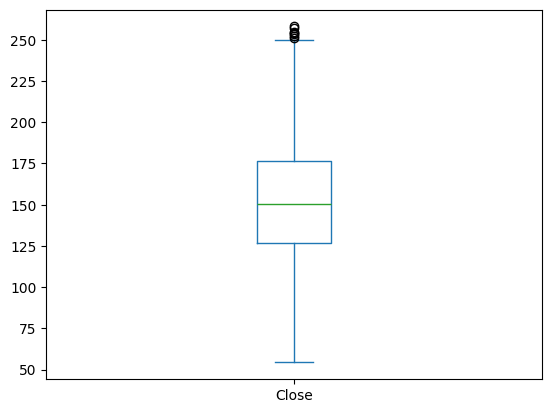

In [1323]:
# Pour détecter d'autres anomalies (comme le cas des valeurs abérrentes) on peut faire de graphiques (comme des boxplot)
data.Close.plot.box()
plt.savefig("data_boxplot.png")

On peut aller encore plus loin et mettre en place des modèles pour détecter les outliers.

Considérons qu'on souhaite développer un modèle de ML qui permet de prédire si le prix sera à la hausse demain ou pas en utilisant deux critères : la moyenne mobile simple sur 20 périodes (SMA(20)) et l'indicateur RSI.

In [1324]:
# !pip install ta

In [1325]:
import ta

In [1326]:
# Calcul de la SMA
n = 20 # période
data["SMA_20"] = data["Close"].rolling(window=n).mean()
data["RSI"] = ta.momentum.RSIIndicator(data["Close"]).rsi() #On utilise le package ta.momentum.RSIIndicator() à l'intérieur duquel on met nos données Close et on termine par .rsi() 

In [1327]:
data.tail()

Price,Close,High,Low,Open,Volume,SMA_20,RSI
Date,,,,,,,
2024-12-23,254.367035,254.745680,252.553466,253.868804,40858800,244.160250,73.085637
2024-12-24,257.286682,257.296626,254.386957,254.586262,23234700,245.422272,75.750272
2024-12-26,258.103729,259.179926,256.718662,257.276679,27237100,246.616033,76.452848
2024-12-27,254.685883,257.784897,252.164833,256.917949,42355300,247.645380,67.626273
2024-12-30,251.307861,252.603266,249.862994,251.337754,35557500,248.386250,60.225555


On a nos deux variables explicatives, on va ensuite construire la variable qu'on souhaite prédire pour identifier le prix de demain.

In [1328]:
data["Target"] = (data["Close"].shift(-1) > data["Close"]).astype(int)
data

Price,Close,High,Low,Open,Volume,SMA_20,RSI,Target
Date,,,,,,,,
2020-01-02,72.538513,72.598892,71.292304,71.545890,135480400,NaN,NaN,0
2020-01-03,71.833298,72.594063,71.608692,71.765674,146322800,NaN,NaN,1
2020-01-06,72.405655,72.444298,70.702990,70.954166,118387200,NaN,NaN,0
2020-01-07,72.065140,72.671333,71.845362,72.415330,108872000,NaN,NaN,1
2020-01-08,73.224411,73.526303,71.768086,71.768086,132079200,NaN,NaN,1
...,...,...,...,...,...,...,...,...
2024-12-23,254.367035,254.745680,252.553466,253.868804,40858800,244.160250,73.085637,1
2024-12-24,257.286682,257.296626,254.386957,254.586262,23234700,245.422272,75.750272,1
2024-12-26,258.103729,259.179926,256.718662,257.276679,27237100,246.616033,76.452848,0


In [1329]:
# Supprimer les valeurs manquantes
data.dropna(inplace=True)
data

Price,Close,High,Low,Open,Volume,SMA_20,RSI,Target
Date,,,,,,,,
2020-01-30,78.218895,78.272028,76.982348,77.414659,126743200,75.360955,66.349977,0
2020-01-31,74.750801,77.931528,74.456154,77.508879,199588400,75.471569,48.053247,0
2020-02-03,74.545494,75.712000,72.990148,73.492492,173788400,75.607179,47.223044,1
2020-02-04,77.006508,77.197305,75.745808,76.151549,136616400,75.837222,56.847251,1
2020-02-05,77.634460,78.433869,77.030677,78.134387,118826800,76.115688,58.906421,1
...,...,...,...,...,...,...,...,...
2024-12-23,254.367035,254.745680,252.553466,253.868804,40858800,244.160250,73.085637,1
2024-12-24,257.286682,257.296626,254.386957,254.586262,23234700,245.422272,75.750272,1
2024-12-26,258.103729,259.179926,256.718662,257.276679,27237100,246.616033,76.452848,0


3. **Construire un modèle de classification pour le trading**

Dans cette partie, nous allons construire un **modèle de classification** pour prédire des signaux d'achat ou de vente à partir des données bourssières.

**Objectif**

Le but est d'apprendre à une machine à **classer chaque jour boursie** en deux catégories :

- **1 = Achat** : le prix a de fortes chances d'augmenter demain.

- **0 = Vente** : le prix risque de baisser ou de stagner

Ce type de modèle est utilisé dans des stratégies dites **discrétionnaires automatisées**, où chaque prédiction devient un **signal de trading**.

**Example**

Nous allons utiliser des **indicateurs techniques** comme :

- La moyenne mobile (SMA)

- Le RSI (Relative Strength Index)

Ces indicateurs serviront de **features** (variables explicatives) pour notre modèle.

Ensuite, on utilisera un **Classificateur de type RandomForest** (ou SVM, KNN, etc.) pour :

- **Apprendre à partir de données historiques**

- **Générer un signal binaire : acheter ou non**

**Etapes à suivre** :

1. Séparer les données en **variables explicatives (features) et cible (target)**

2. Diviser la dataset en **jeu d'entraînement et jeu de test**

3. Entraîner un modèle de classification

4. Evaluer la **précision des prédictions** à l'aide de métrique comme `accuracy`, `precision`, `recall`, `f1-score`

Ce modèle sera plus tard intégré dans une **stratatégie de trading automatisée** que nous pourrons simuler


In [1330]:
# !pip install scikit-learn

In [1331]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

In [1332]:
# Features
features=["SMA_20", "RSI"]
X = data[features]

# Target
y = data["Target"]

In [1333]:
# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [1334]:
# Modèle
clf = RandomForestClassifier(n_estimators=100, random_state=0) # Les paramètres que prend cette fonction doivent être optimisés

In [1335]:
# Entraînement
clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [1336]:
# Prédictions
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred)) # Voir la précision du modèle

# Plus la précision est élevée plus le modèle est performant

              precision    recall  f1-score   support

           0       0.42      0.79      0.55       106
           1       0.55      0.19      0.28       142

    accuracy                           0.45       248
   macro avg       0.49      0.49      0.42       248
weighted avg       0.50      0.45      0.40       248



**Lorsqu'on fait de la classification**, les paramètres qu'on doit regarder est l'**auc** et la courbe roc **roc_curve**. Ce sont des indicateurs qui permettent de juger de la pertinence de notre modèle.

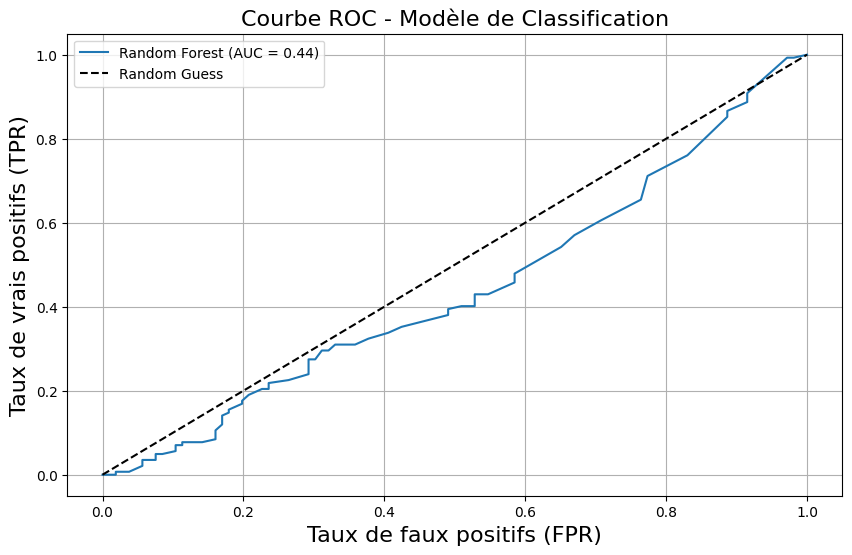

In [1337]:
# Prédictions probabilities
y_prob = clf.predict_proba(X_test)[:,1]

# Calcul ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Affichage courbe ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], 'k--', label = "Random Guess")
plt.xlabel("Taux de faux positifs (FPR)", fontsize=16)
plt.ylabel("Taux de vrais positifs (TPR)", fontsize=16)
plt.title("Courbe ROC - Modèle de Classification", fontsize=16)
plt.legend(loc="upper left")
plt.grid(True)
plt.show()


On remarque l'**AUC=44%**. Le modèle n'est pas performant car un modèle performant est un modèle qui a un **AUC > 50%**.

4. **Construire un modèle de régression pour prévoir les prix**

Dans cette partie, nous allons construire un modèle de régression pour estimer les prix futurs d'une action à partir des données historiques.

**Objectif**

Contrairement à un modèle de classification, qui prédit une classe (ex "achat" ou "vente"), un modèle de régression permet de prédire une valeur numérique continue. Dans le cadre de ce projet, nous cherchons à estimer le prix de clôture du lendemain à partir des indicateurs techniques calculés aoujourd'hui.

L'objectif est d'anticiper les variations futures du marché afin de prendre des décisions d'investissement éclairées.

**Exemple de cas d'usage**

Si le modèle prédit que le prix de l'action Apple sera de 145.30 \$ demain, alors qu'il est aujourd'hui à 140.00 \$, cela peut indiquer une opportunité d'achat. Inversement, une baisse anticipée du prix peut justifier une décision de vente.

**Modèles de régression possible**

Voici quelques modèles fréquemment utilisés pour ce type de tâche :

- Régression linéaire
- Lasso et Ridge (régularités)
- Random Forest Regressor
- Gradient Boosting Regressor (XBoost, LightGBM, etc.)

Nous utiliserons ico le modèle Random Forest Regressor, bien adapté aux relations complexes et non linéaires dans les données financières


**Etapes à suivre**

1. Créer la variable cible en décalant le prix de clôture d'un jour : `Close_tomorrow = Close.shift(-1)`

2. Sélectionner les indicateurs techniques comme variables explicatives (features)

3. Diviser les données en jeu d'entraînement et de test

4. Entraîner le modèle de régression

5. Evaluer la qualité des prédictions à l'aide de métriques appropriées : 

- RMSE (Root Mean Square Error) : mesure l'erreur quadratique moyenne

- MAE (Mean Absolute Error) : moyenne des écarts absolus

- $R^2$ (Coefficient de détermination) : proportion de la variance expliquée par le modèle


**Remarques**

Un bon modèle de régression ne garantit pas une bonne stratégie de trading. Il est essentiel de :

- Vérifier la stabilité du modèle dans le temps 

- Intégrer les prédictions dans une stratégie d'investissement testée sur le long terme 

- Comparer les performances à des approches plus simples (moyenne mobile, Buy \& Hold, etc.)


L'intégration d'un modèle de régression dans une stratégie de trading fera l'objet de la prochaine section.

In [1338]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [1339]:
data

Price,Close,High,Low,Open,Volume,SMA_20,RSI,Target
Date,,,,,,,,
2020-01-30,78.218895,78.272028,76.982348,77.414659,126743200,75.360955,66.349977,0
2020-01-31,74.750801,77.931528,74.456154,77.508879,199588400,75.471569,48.053247,0
2020-02-03,74.545494,75.712000,72.990148,73.492492,173788400,75.607179,47.223044,1
2020-02-04,77.006508,77.197305,75.745808,76.151549,136616400,75.837222,56.847251,1
2020-02-05,77.634460,78.433869,77.030677,78.134387,118826800,76.115688,58.906421,1
...,...,...,...,...,...,...,...,...
2024-12-23,254.367035,254.745680,252.553466,253.868804,40858800,244.160250,73.085637,1
2024-12-24,257.286682,257.296626,254.386957,254.586262,23234700,245.422272,75.750272,1
2024-12-26,258.103729,259.179926,256.718662,257.276679,27237100,246.616033,76.452848,0


In [1340]:
data["Close_tomorrow"] = data["Close"].shift(-1)

In [1341]:
data.tail()

Price,Close,High,Low,Open,Volume,SMA_20,RSI,Target,Close_tomorrow
Date,,,,,,,,,
2024-12-23,254.367035,254.745680,252.553466,253.868804,40858800,244.160250,73.085637,1,257.286682
2024-12-24,257.286682,257.296626,254.386957,254.586262,23234700,245.422272,75.750272,1,258.103729
2024-12-26,258.103729,259.179926,256.718662,257.276679,27237100,246.616033,76.452848,0,254.685883
2024-12-27,254.685883,257.784897,252.164833,256.917949,42355300,247.645380,67.626273,0,251.307861
2024-12-30,251.307861,252.603266,249.862994,251.337754,35557500,248.386250,60.225555,0,NaN


In [1342]:
data.dropna(inplace=True)


In [1343]:
# Features
X = data[features]

# Target
y = data["Close_tomorrow"]

In [1344]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [1345]:
reg = RandomForestRegressor(n_estimators=100)

In [1346]:
reg.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [1347]:
y_pred = reg.predict(X_test)

In [1348]:
type(y_pred)

numpy.ndarray

In [1349]:
print(f"RMSE :  {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R^2  :  {r2_score(y_test, y_pred)}") # R^2 (qui est le pouvoir explicatif du modèle) nous aide à savoir à quel point les variables qu'on a utilisé pour l'entraînement permettent d'expliquer la variable cible 

RMSE :  29.686888870673204
R^2  :  -0.35561216437976584


Le $R^2$ est négatif, le modèle n'est pas performant. Un $R^2$ efficace est au dessus de 0.5

Si on a un $R^2$ = 60%, cela veut dire que le modèle explique 60% des variabilités de votre variable cible.

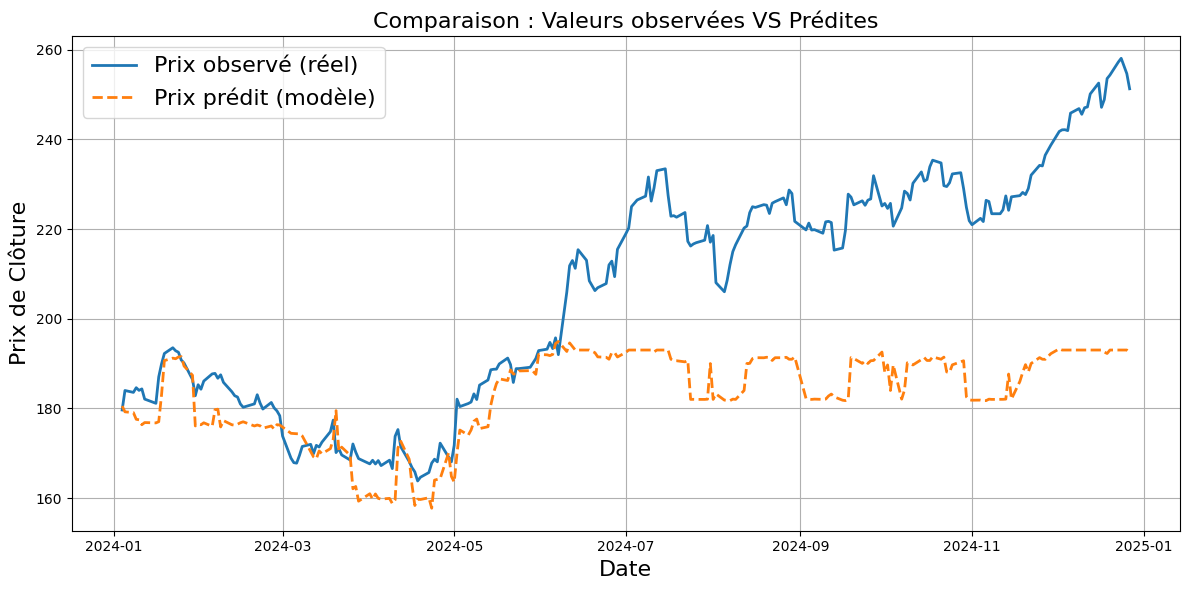

<Figure size 640x480 with 0 Axes>

In [1350]:
# Visulisation des valeurs observées et prédites

plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test.values, label = "Prix observé (réel)", linewidth=2)
plt.plot(y_test.index, y_pred, label = "Prix prédit (modèle)", linestyle = "--", linewidth=2)
plt.title("Comparaison : Valeurs observées VS Prédites", fontsize = 16)
plt.xlabel("Date", fontsize = 16)
plt.ylabel("Prix de Clôture", fontsize=16)
plt.legend(loc="upper left", fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig("Prix_observe_vs_prix_predit")

## 5. Testter les performnaces des modèles ML


**Évaluation des performances des modèles**

Une fois les modèles entraînés (classification ou régression), il est essentiel d’évaluer leur performance à l’aide de métriques adaptées. Voici un tableau récapitulatif des principales métriques utilisées :

| **Métrique**        | **Type de modèle** | **Interprétation** |
|---------------------|--------------------|---------------------|
| Accuracy            | Classification     | Proportion de prédictions correctes. Peut être trompeuse si les classes sont déséquilibrées. |
| Précision           | Classification     | Parmi les prédictions positives, combien sont correctes ? Mesure la qualité des prédictions positives. |
| Recall              | Classification     | Parmi les vraies valeurs positives, combien ont été correctement prédites ? Utile pour ne pas rater les cas importants. |
| F1-score            | Classification     | Moyenne harmonique entre précision et rappel. Bon compromis lorsque les classes sont déséquilibrées. |
| AUC (ROC)           | Classification     | Surface sous la courbe ROC. Mesure la capacité du modèle à distinguer les classes. 1 = parfait, 0.5 = aléatoire. |
| RMSE                | Régression         | Racine de l’erreur quadratique moyenne. Plus la valeur est basse, meilleure est la prédiction. |
| MAE                 | Régression         | Moyenne des erreurs absolues. Représente l’erreur moyenne en valeur absolue. |
| R² (coefficient de détermination) | Régression | Proportion de la variance expliquée par le modèle. 1 = parfait, 0 = aucune explication. Une valeur négative signifie que le modèle est pire que la moyenne. |




## 6. Intégrer le modèle ML dans une stratégie de trading

Jusqu'ici, nous avons entraîné des modèles de Machine Learning pour prédire des signaux (achat/vente) ou des prix futurs. Cependant, une prédiction seule n'a pas de valeur si elle n'est pas **intégrer dans une stratégie concrète de prise de décision**. Cette part consiste à transformer les résultats du modèle en **actions exploitables sur les marchés**.

**Objectif**

Utiliser les prédictions du modèle pour générer des **signaux de trading automatiques**, puis simuler une stratégie d'investissement basée sur ces signaux. Cela permet de tester si le modèle aurait permis de réaliser un profit, comparé à une stratégie de base comme **Buy & Hold**

**Principe de fonctionnement**

1. **Générer les signaux** : à partir des prédictions du modèle (classification), on crée une colonne "Signal" qui indique quoi faire :

- `1`-> acheter (anticipation de hausse)

- `0`-> ne rien faire ou vendre (anticipation de baisse)

2. **Calculer les rendements**

- `Returns`: les rendements quotidiens réels du marché (basés sur le prix de clôture)

- `Strategy_Returns` : rendements générés par la stratégie basée sur les signaux du modèle

3. **Comparer les performances**

- Simuler les deux stratégies dans le temps :

    - Buy & Hold : investir au début et ne rien faire jusqu'à la fin

    - ML strategy : acheter uniquement lorsque le modèle le recommande

- Visualiser les **performances cumulées** dans un graphique

**Avantages de cette approche**

- Permet de **valider la valeur réelle** du modèle dans un contexte d'investissement

- Met en évidence les cas où le modèle aurait **généré un gain ou une perte**

- Sert de base à une **optimisation future** (filtrage des signaux, stop loss, take profit, etc.)

**Limites**

- Ce backtest ne prend pas encore en compte les **frais de transaction, glissements, ou volumes disponibles**, qui peuvent impacter fortement les performances réelles.

- Il s'agit d'une simulation sur le passé :une bonne performance historique ne garantit pas des résultats futurs

L'intégration de ces signaux dans une **stratégie de trading robuste et testée** est une étape clé vers l'automatisation et l'application réelle du Machine Learning en finance.

In [1351]:
data.head()

Price,Close,High,Low,Open,Volume,SMA_20,RSI,Target,Close_tomorrow
Date,,,,,,,,,
2020-01-30,78.218895,78.272028,76.982348,77.414659,126743200,75.360955,66.349977,0,74.750801
2020-01-31,74.750801,77.931528,74.456154,77.508879,199588400,75.471569,48.053247,0,74.545494
2020-02-03,74.545494,75.712000,72.990148,73.492492,173788400,75.607179,47.223044,1,77.006508
2020-02-04,77.006508,77.197305,75.745808,76.151549,136616400,75.837222,56.847251,1,77.634460
2020-02-05,77.634460,78.433869,77.030677,78.134387,118826800,76.115688,58.906421,1,78.542519


In [1352]:
import numpy as np
import matplotlib.pyplot as plt

In [1353]:
# Etape 1 : Générer les signaux de trading à partir de prédictions du modèle de classification
# On utilise les prédictions sur le jeu de test

data_test = data.iloc[-len(y_test):].copy() # Copy alignée avec X_test

In [1354]:
data_test["Signal"] = clf.predict(X_test)
data_test

Price,Close,High,Low,Open,Volume,SMA_20,RSI,Target,Close_tomorrow,Signal
Date,,,,,,,,,,
2024-01-04,180.382812,181.552899,179.361461,180.620788,71983600,191.572086,29.828349,0,179.658936,0
2024-01-05,179.658936,181.225673,178.657420,180.462148,62379700,191.019760,28.841658,1,184.002197,0
2024-01-08,184.002197,184.041870,179.976284,180.561327,59144500,190.587917,41.372721,0,183.585693,0
2024-01-09,183.585693,183.595604,181.195922,182.375934,42841800,190.063853,40.633734,1,184.626877,0
2024-01-10,184.626877,184.835105,182.375930,182.802328,46792900,189.717286,43.357429,0,184.031906,0
...,...,...,...,...,...,...,...,...,...,...
2024-12-20,253.589798,254.097988,244.820923,247.162601,147495300,242.894741,72.334164,1,254.367035,0
2024-12-23,254.367035,254.745680,252.553466,253.868804,40858800,244.160250,73.085637,1,257.286682,0
2024-12-24,257.286682,257.296626,254.386957,254.586262,23234700,245.422272,75.750272,1,258.103729,0


In [1355]:
# Etape 2 : Calculer les rendements du marché
# Rendement quotidien : variation relative du prix de clôture
data_test["Returns"] = data_test["Close"].pct_change()

# Rendement de la stratégie basée sur les signaux
# On applique le signal de la veille au rendement du jour
data_test["Strategy_Returns"] = data_test["Returns"]*data_test["Signal"].shift(1)

In [1356]:
# Etape 3 : Performance cumulée

data_test["Cumulative_Market"] = (1 + data_test["Returns"]).cumprod()
data_test["Cumulative_Strategy"] = (1 + data_test["Strategy_Returns"]).cumprod()

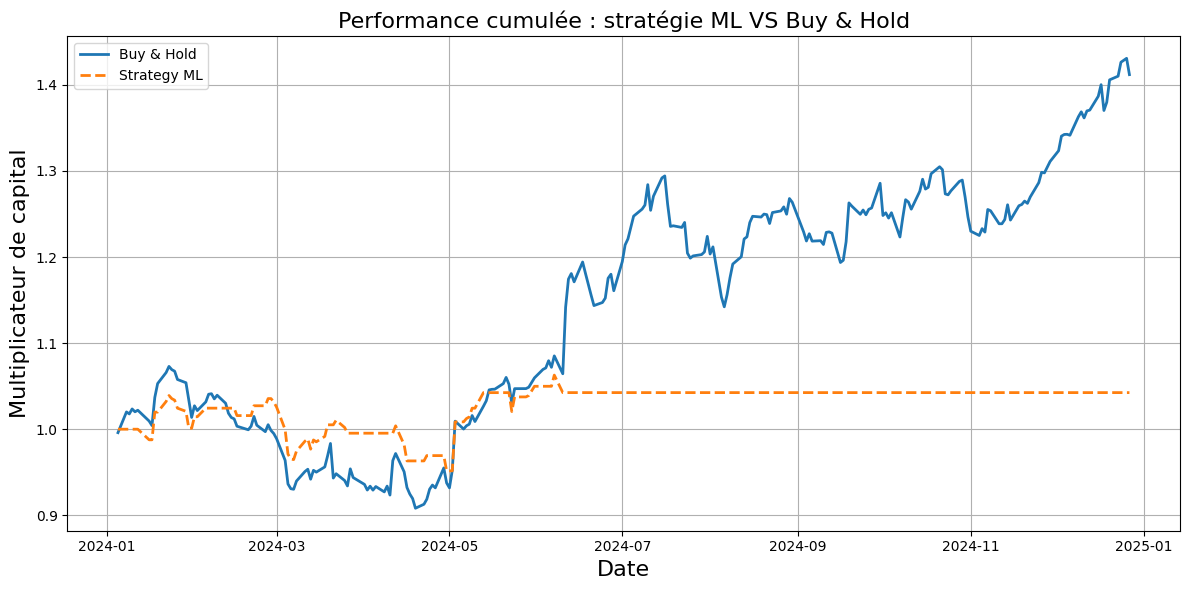

In [1357]:
# Etape 4 : Visualisation 

plt.figure(figsize=(12, 6))
plt.plot(data_test.index, data_test["Cumulative_Market"], label = "Buy & Hold", linewidth=2)
plt.plot(data_test.index, data_test["Cumulative_Strategy"], label = "Strategy ML", linewidth=2, linestyle="--")
plt.title("Performance cumulée : stratégie ML VS Buy & Hold", fontsize=16)
plt.xlabel("Date", fontsize=16)
plt.ylabel("Multiplicateur de capital", fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Défi** : Prédire le prix avec XGBoost Regressor

- Dans ce défi, vous allez remplacez le modèle `RandomForestRegressor`par le modèle `XGBoostRegressor`afin de prédire le prix de clôture du lendemain de l'acttion d'Apple.

    - Utiliser `XGBRegressor`de la bibliothèque `xgboost``

    - Entraîner le modèle sur des données préparées (`SMA_20`, `RSI`)

    - Prédire le prix de clôture du lendemain (`Close_tomorrow`)

    - Evaluer les performances du modèle avec les métrique pertinentes

In [1358]:
# !pip install xgboost

In [1359]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [1360]:
data_test.head()

Price,Close,High,Low,Open,Volume,SMA_20,RSI,Target,Close_tomorrow,Signal,Returns,Strategy_Returns,Cumulative_Market,Cumulative_Strategy
Date,,,,,,,,,,,,,,
2024-01-04,180.382812,181.552899,179.361461,180.620788,71983600,191.572086,29.828349,0,179.658936,0,NaN,NaN,NaN,NaN
2024-01-05,179.658936,181.225673,178.657420,180.462148,62379700,191.019760,28.841658,1,184.002197,0,-0.004013,-0.0,0.995987,1.0
2024-01-08,184.002197,184.041870,179.976284,180.561327,59144500,190.587917,41.372721,0,183.585693,0,0.024175,0.0,1.020065,1.0
2024-01-09,183.585693,183.595604,181.195922,182.375934,42841800,190.063853,40.633734,1,184.626877,0,-0.002264,-0.0,1.017756,1.0
2024-01-10,184.626877,184.835105,182.375930,182.802328,46792900,189.717286,43.357429,0,184.031906,0,0.005671,0.0,1.023528,1.0


In [1361]:
features = ["SMA_20", "RSI"]
X = data_test[features]
y = data_test["Close_tomorrow"]

In [1362]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size = 0.2)

In [1363]:
XGB_reg = XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators = 1000,
                       early_stopping_rounds=50,
                       objective = "reg:squarederror",
                       max_depth = 3,
                       random_state=42,
                       learning_rate= 0.01)

In [1364]:
XGB_reg.fit(X_train, y_train,
            eval_set = [(X_train, y_train), (X_test, y_test)],
            verbose=100)

[0]	validation_0-rmse:197.29291	validation_1-rmse:233.95061
[100]	validation_0-rmse:73.36416	validation_1-rmse:96.89054
[200]	validation_0-rmse:27.62217	validation_1-rmse:45.85876
[300]	validation_0-rmse:10.76981	validation_1-rmse:26.54204
[400]	validation_0-rmse:4.82930	validation_1-rmse:18.62661
[500]	validation_0-rmse:2.99617	validation_1-rmse:14.83362
[600]	validation_0-rmse:2.47438	validation_1-rmse:13.31620
[700]	validation_0-rmse:2.27094	validation_1-rmse:12.60555
[800]	validation_0-rmse:2.15541	validation_1-rmse:12.29162
[900]	validation_0-rmse:2.08798	validation_1-rmse:12.13215
[999]	validation_0-rmse:2.01092	validation_1-rmse:12.01748


,objective,'reg:squarederror'
,base_score,0.5
,booster,'gbtree'
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,50
,enable_categorical,False
,eval_metric,None


In [1365]:
y_pred = XGB_reg.predict(X_test)

In [1366]:
print(f"RMSE :  {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"MAE  :  {mean_absolute_error(y_test, y_pred)}")
print(f"R^2  :  {r2_score(y_test, y_pred)}") # R^2 (qui est le pouvoir explicatif du modèle) nous aide à savoir à quel point les variables qu'on a utilisé pour l'entraînement permettent d'expliquer la variable cible 

RMSE :  12.017482605879364
MAE  :  8.501371765136719
R^2  :  -0.20776558555977287


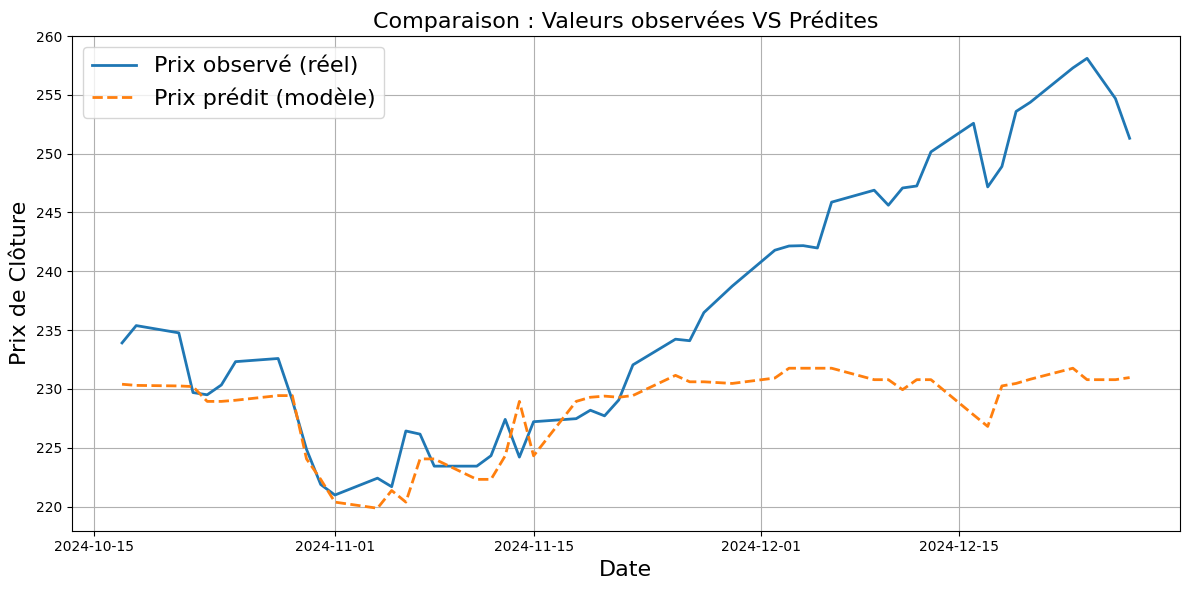

In [1367]:
# Visulisation des valeurs observées et prédites

plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test.values, label = "Prix observé (réel)", linewidth=2)
plt.plot(y_test.index, y_pred, label = "Prix prédit (modèle)", linestyle = "--", linewidth=2)
plt.title("Comparaison : Valeurs observées VS Prédites", fontsize = 16)
plt.xlabel("Date", fontsize = 16)
plt.ylabel("Prix de Clôture", fontsize=16)
plt.legend(loc="upper left", fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.savefig("Prix_observe_vs_prix_predit")
plt.show()